# Pràctica 6: Arbres de Decisió


### Introducció

Els arbres de decisió són un dels algorismes d’aprenentatge automàtic més populars. Utilitzen una estructura semblant a la dels arbres (o també en possibles combinacions seves). Pertany a la classe d’algoritmes d’aprenentatge supervisat on es pot utilitzar tant amb finalitats de classificació com de regressió.


Un arbre de decisió és una estructura que inclou un node arrel, branques i nodes de fulles. Cada node intern indica una prova d'un atribut, cada branca indica el resultat d'una prova i cada node fulla té una etiqueta de classe. El node més superior de l'arbre és el node arrel.

La terminologia implicada en l'algorisme de l'arbre de decisions són els següents:

* **Node arrel**: Representa tota la població o la mostra. A més, es divideix en dos o més conjunts homogenis.
* **Divisió**: És el procés de dividir un node en dos o més subnodes.
* **Node de decisió**: Quan un node es divideix en altres subnodes, es diu node de decisió.
* **Fulla / node terminal**: Els nodes que no es divideixen s’anomenen nodes Fulla o Terminals.
* **Poda**: Quan eliminem els subnodes d’un node de decisió, aquest procés s’anomena poda. És el procés contrari de la divisió.
* **Branca / subarbre**: Una subsecció d'un arbre sencer s'anomena branca o subarbre.
* **Node pare i fill**: Un node, que es divideix en subnodes, s’anomena node pare de subnodes on els subnodes són fills d’un node pare.

![Decision-Tree terminology](decission.png)

Com s'ha explicat a teoria, els arbres de decisió originals treballaven sobre atributs categorics sense problema. Ara bé, la implementació de sklearn i la majoria de les actuals, necesita dades númeriques, aixi que haurem de transformar les nostres bases de dades a aquesta tipologia.

Explicació del la tipologia de arbres de Decisió: ID3, C4.5, C5.0 i CART. Sabeu quin està implementat a sklearn i per què les dades d'entrada han de ser numèriques i no categòriques? **[Pista](https://scikit-learn.org/stable/modules/tree.html)**




### Datasets

Es faràn servir dues bases de dades:

* **car_evaluation.csv** (target: 'class') 

* **income_evaluation.csv** (target: 'income')

Inicialment, es farán les proves amb el car_evaluation. Al apartat D s'utilitzaràn els dos. De tota forma, si ho preferiu, també podeu anar fer proves amb income_evaluation ens els altres apartats.


In [2]:
# Importar llibreries i obrir el dataset

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_theme()

# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple

dataset_path = 'income_evaluation.csv'
target_name = 'income'

dataset_path = 'car_evaluation.csv'
target_name = 'class'

dataset = load_dataset(dataset_path)
y = dataset[target_name]
X = dataset.drop(target_name, axis="columns")

print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (1728, 7)


In [3]:
display(dataset)

display(y)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1382, 6), (346, 6))

## A. Estructura dels Arbres de Decisió i codificació d'atributs

Com transformar dades Categoriques en numèriques:

**[module-sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)**

o bé, 

**[Category Encoders](https://contrib.scikit-learn.org/category_encoders/)**

Aquesta llibreria us permetrar provar codificacions ben diferents..:
* BackwardDifferenceEncoder
* BaseNEncoder
* BinaryEncoder
* CatBoostEncoder
* CountEncoder
* GLMMEncoder
* HashingEncoder
* HelmertEncoder
* JamesSteinEncoder
* LeaveOneOutEncoder
* MEstimateEncoder
* OneHotEncoder
* OrdinalEncoder
* SumEncoder
* PolynomialEncoder
* TargetEncoder
* WOEEncoder

En aquest enllaç hi podreu trobar alguns **[exemples](https://www.kaggle.com/discdiver/category-encoders-examples)**.

**[Com aplicar-ho a pandas?](https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn)**


In [5]:
!pip install category_encoders  graphviz


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:

print(X_test.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


In [7]:
# Una manenra d'aplicar-ho a columnes en concret
import category_encoders as ce

# encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
encoder = ce.OrdinalEncoder(cols=['buying'])

encoded_X_train_1 = encoder.fit_transform(X_train)
encoded_X_test_1 = encoder.transform(X_test)


In [8]:
# Una altra manera per fer-ho a totes les columnes no númeriques..

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

encoders = defaultdict(LabelEncoder)
print(encoders)

# Encoding the variable
encoded_X_train_2 = X_train.apply(lambda x: encoders[x.name].fit_transform(x))
encoded_X_test_2 = X_test.apply(lambda x: encoders[x.name].transform(x))

# Inverse the encoded
inversed_X_train = encoded_X_train_2.apply(lambda x: encoders[x.name].inverse_transform(x))

# Using the dictionary to label future data
# X_train.apply(lambda x: encoders[x.name].transform(x))

print("\n The result of transforming X with LabelEncoder:")
print(encoded_X_train_2)


defaultdict(<class 'sklearn.preprocessing._label.LabelEncoder'>, {})

 The result of transforming X with LabelEncoder:
      buying  maint  doors  persons  lug_boot  safety
107        3      3      3        2         0       0
901        2      3      1        1         2       2
1709       1      1      3        0         0       0
706        0      2      2        0         1       2
678        0      2      1        0         1       1
...      ...    ...    ...      ...       ...     ...
1130       2      2      1        2         1       0
1294       2      1      3        2         0       2
860        0      1      3        2         1       0
1459       1      0      2        0         2       2
1126       2      2      1        2         2       2

[1382 rows x 6 columns]


## Creació i visualització d'arbres de decisió

Sklearn ens dona una versió bàsica dels algorismes de generació d'arbres de decisió [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Caldrà treballar sobre els diferents paràmetres per a obtenir la millor solució per, almenys, un dels problemes plantejats.

Per visualitzar els arbres hi ha diferents possibilitats que podeu usar [exemples](https://mljar.com/blog/visualize-decision-tree/)

In [9]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz 


clf = DecisionTreeClassifier(random_state=1234)
clf.fit(encoded_X_train_2, y_train)
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_3 <= 0.50
|   |--- class: unacc
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |--- class: unacc
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- class: acc
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- class: unacc
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |   |--- feature

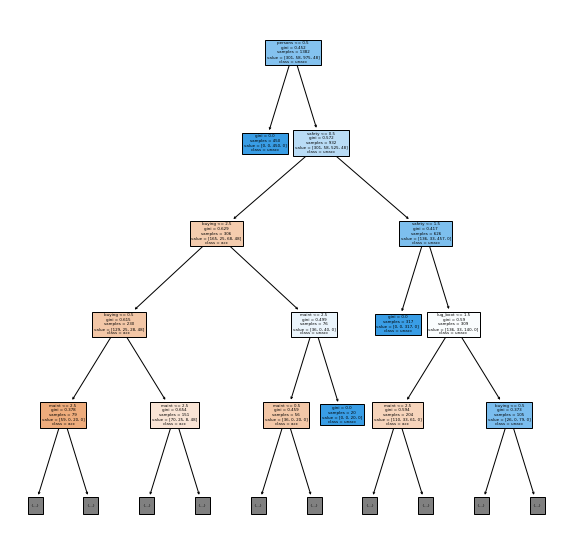

In [10]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, max_depth=4,
                   feature_names=X.columns,
                   class_names=clf.classes_,
                   filled=True)
plt.show()


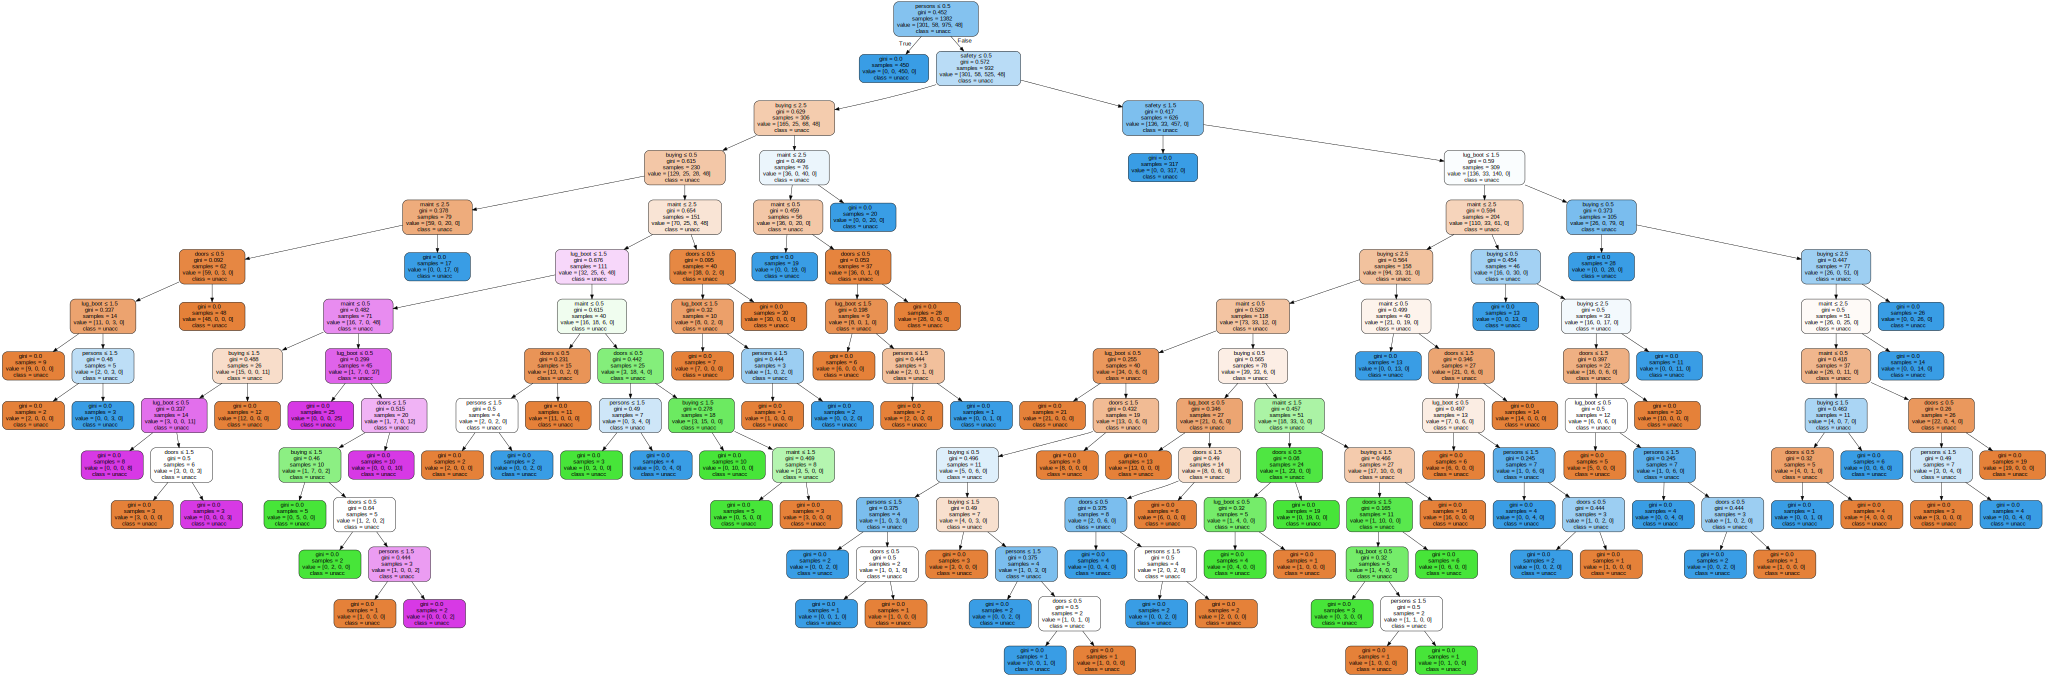

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Un cross validation NO és un random forest !!

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

### Preguntes
1. Proveu diferents codificacions per transformar els vostres atributs categorics en númerics. Expliqueu els beneficis o inconvenients de les codificacions provades.
2. Crea un arbre arbre de decisió amb les dades transformades.
3. Mostra el arbre de diferents formes
4. Extreu caracteristiques que quantifiquin com és l'arbre. Més endavant també en farem ús per comparar diferents arbres. A continuació et mostro algunes possibles característiques. Penseu en generar-ne alguna més que cregueu útil:
 * número de nodes total,
 * número de nodes fulla,
 * ratio de nodes fulla respecte el total,
 * profunditat mitjana de les fulles,
 * atributs més utilitzats,
 * entropia o impuresa dels nodes fulla
 * ... 
5. Com afecta la codificació utilitzada a la interpretabilitat del model, veus alguna relació amb les característiques del arbre?



##### La codificació  afecta  la manera en la que l'arbre creix i pren decissions. Està clar que no totes les codificacions mantenen unes bones distancies amb les altres feautures, per tant pot ser que l'arbre hagi de fer més branching per a poder arribar a una solució. 
##### Amb les característiques del arbre podem veure com d'específic pot ser el arbre (Complex). Així un node amb moltes possibles fulles és molt molt específic (model complex)  i podem dir que tindrà un error de variança  gran per que s'ha adaptat a les dades. 
##### Sapiguent això podem dir que el codificador i les característiques tenen una correlació alta

#### Aquesta classe respon a gairebé totes les preguntes

In [103]:
import networkx as nx
from sklearn import tree
import pydot


def prepare_inputs(X_train,X_test,func_to_encode,list_of_target = None):
    if func_to_encode.__name__ == "LabelEncoder":
        encoders = defaultdict(func_to_encode)

        x_train_enc = X_train.apply(lambda x: encoders[x.name].fit_transform(x))
        x_test_enc = X_test.apply(lambda x: encoders[x.name].transform(x))
        inverse_enc = x_train_enc.apply(lambda x: encoders[x.name].inverse_transform(x))
    
    elif func_to_encode.__name__ == "BackwardDifferenceEncoder":
        enc = func_to_encode()
        if list_of_target != None:
            x_train_enc = enc.fit_transform(X_train,list_of_target[0])
            x_test_enc = enc.transform(X_test,list_of_target[1])
            inverse_enc = None
            
        else:            
            x_train_enc = enc.fit_transform(X_train)
            x_test_enc = enc.transform(X_test)
            inverse_enc = None
            
    else:
        enc = func_to_encode()
        x_train_enc = enc.fit_transform(X_train)
        x_test_enc = enc.transform(X_test)
        inverse_enc = enc.inverse_transform(x_train_enc)

    return x_train_enc,x_test_enc, inverse_enc

def prepare_outputs(y_train,y_test):
    
    encoders = defaultdict(LabelEncoder)
    
    enc = LabelEncoder()
    
    y_train_enc = enc.fit_transform(y_train)
    y_test_enc = enc.transform(y_test)
    inverse_enc = enc.inverse_transform(y_train_enc)
    
    return y_train_enc,y_test_enc, inverse_enc

def Make_Model(data,target,**kwargs):
    
    if (len(kwargs)) == 0:
        clf = DecisionTreeClassifier()
    else:
        clf = DecisionTreeClassifier(**kwargs)

    clf = clf.fit(data,target)
    
    return clf

def plotting(model):
    
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                   filled=True)
    
def get_nodes(model):
    return model.tree_.node_count

def get_leaves(model):
    return model.get_n_leaves()

def childrens(model):
    
    return model.tree_.children_left,model.tree_.children_right


def dt_to_mg(clf):
    """convert a fit DecisionTreeClassifier to a Networkx undirected MultiGraph"""
    # export the classifier to a string DOT format
    dot_data = tree.export_graphviz(clf)
    # Use pydot to convert the dot data to a graph
    dot_graph = pydot.graph_from_dot_data(dot_data)[0]
    # Import the graph data into Networkx 
    MG = nx.drawing.nx_pydot.from_pydot(dot_graph)
    # Convert the tree to an undirected Networkx Graph
    uMG = MG.to_undirected()
    G=nx.Graph()
    for u,v,data in uMG.edges(data=True):
    
        w = data['weight'] if 'weight' in data else 1.0
        if G.has_edge(u,v):
            G[u][v]['weight'] += w
        else:
            G.add_node(u,label = uMG.nodes[u]['label'])
            G.add_node(v,label = uMG.nodes[v]['label'])
            G.add_edge(u,v)
    return G


def get_analisis(model, X):
        
    #Aquest treshold suposa que totes les feautures són igual d'importants
    threshold = 1/model.n_features_
    
    list_of_impor = model.feature_importances_
    feautures = list(X.columns)
    d = {i:j for i,j in sorted(zip(feautures,list_of_impor), key=lambda x: x[1], reverse=True)}  
    print("el nombre de nodes es: ", get_nodes(model))
    print("-----------------------------------------------------------------------------------")
    print(f"El nom de fulles que te aquest model es:  {get_leaves(model)}")
    print("-----------------------------------------------------------------------------------")
    print(f"El ratio de nodes fulla respecte al total es {get_leaves(model)/get_nodes(model)}")
    print("-----------------------------------------------------------------------------------")
    print(f" La importancia que li dona a les feautures es la següent:" )
    print(d.items())
    print("-----------------------------------------------------------------------------------")
    print("Les feautures més importants són:")
    print(list(filter(lambda elem: d[elem] > threshold, d.keys())))
    print("-----------------------------------------------------------------------------------")
    right,left = childrens(model)
    print("El desenvolupament del fill dret es; ")
    print(right)
    print("------------------------------------------------------------------------------------")
    print("El desenvolupament del fill esquerra es; ")
    print(left)
    print("-----------------------------------------------------------------------------------")
    print(f"La depth màxima del arbre és {model.tree_.max_depth}")
    
    
def info_of_tree(clf):
    
    Tree = clf.tree_
    to_extract = [ x for x in dir(Tree) if '__' not in x]
    to_extract2 = [x for x in to_extract if x not in ['apply','children_left',
 'children_right',
 'compute_feature_importances',
 'compute_partial_dependence','feature',
 'impurity','predict',
 'threshold',
 'value',
 'weighted_n_node_samples','decision_path','n_node_samples']]
    main_cat = {k:getattr(Tree,k) for k in to_extract2}
    uMG = dt_to_mg(clf)
    leafs = [x for x in uMG.nodes() if uMG.degree(x)==1]
    distance_to_root = [len(nx.shortest_path(uMG,source=x,target='0')) for x in leafs]
    main_cat['ratio_total_leaves'] = str(main_cat['n_leaves']/ main_cat['node_count'])+'%'
    main_cat['mean_leaf_depth'] = sum(distance_to_root)/len(distance_to_root) if len(distance_to_root)>0 else 1
    main_cat['main_attr_col_idx'] = np.argmax(clf.feature_importances_)+1
    main_cat['main_attr_importance'] = clf.feature_importances_[main_cat['main_attr_col_idx']-1]
    main_cat['node_impurity'] = [[float(uMG.nodes[x]['label'].split("\\")[1].split("=")[1]) for x in leafs]]
    main_cat['node_impurity_mean'] = sum(main_cat['node_impurity'][0] )/len(main_cat['node_impurity'][0] ) if len(main_cat['node_impurity'][0])>0 else 1
    pgrank = nx.pagerank(uMG,alpha=0.8)
    main_cat['max_node_page_rank'] = max(pgrank,key=lambda x:pgrank[x])
    bet_centr = nx.betweenness_centrality(uMG)
    main_cat['most_centered_node'] = max(bet_centr,key=lambda x: bet_centr[x])
    return pd.DataFrame(main_cat)


### 1. Proveu diferents codificacions per transformar els vostres atributs categorics en númerics. Expliqueu els beneficis o inconvenients de les codificacions provades.

#### LabelEncoder

In [54]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

encoders = defaultdict(LabelEncoder)

# Encoding the variable
y_train_lab_enc = LabelEncoder().fit_transform(y_train)
y_test_lab_enc = LabelEncoder().fit_transform(y_test)
encoded_X_train_2 = X_train.apply(lambda x: encoders[x.name].fit_transform(x))
encoded_X_test_2 = X_test.apply(lambda x: encoders[x.name].transform(x))
encoded_X_train_2.head()

,buying,maint,doors,persons,lug_boot,safety
107,3,3,3,2,0,0
901,2,3,1,1,2,2
1709,1,1,3,0,0,0
706,0,2,2,0,1,2
678,0,2,1,0,1,1


In [55]:
model = Make_Model(encoded_X_train_2,y_train_lab_enc)

In [56]:
get_analisis(model, encoded_X_train_2)

el nombre de nodes es:  157
-----------------------------------------------------------------------------------
El nom de fulles que te aquest model es:  79
-----------------------------------------------------------------------------------
El ratio de nodes fulla respecte al total es 0.5031847133757962
-----------------------------------------------------------------------------------
 La importancia que li dona a les feautures es la següent:
dict_items([('safety', 0.25371228091149006), ('maint', 0.24692154888831536), ('persons', 0.1801917400989449), ('buying', 0.1563721737088863), ('lug_boot', 0.10368887131618688), ('doors', 0.0591133850761765)])
-----------------------------------------------------------------------------------
Les feautures més importants són:
['safety', 'maint', 'persons']
-----------------------------------------------------------------------------------
El desenvolupament del fill dret es; 
[  1  -1   3   4   5   6   7   8  -1  10  -1  -1  -1  -1  15  16  17  18

Aquest transformador agafa tots els elements diferents de cada atribut i en crea classes. Després assigna a cada valor de l'atribut la classe numèrica adient. Es recomana fer servir aquest encoding en el target i no en el input a la documentació de sklearn. Per atributs on hi hagi una inferencia temporal el LabelEncoder ha de tindre una bona performance(així com el ordinal encoder com es va comentar a classe). En els atribtus que no es representa ordinalitat aquest tipus d'encoding pot resultar en una performance molt dolenta.

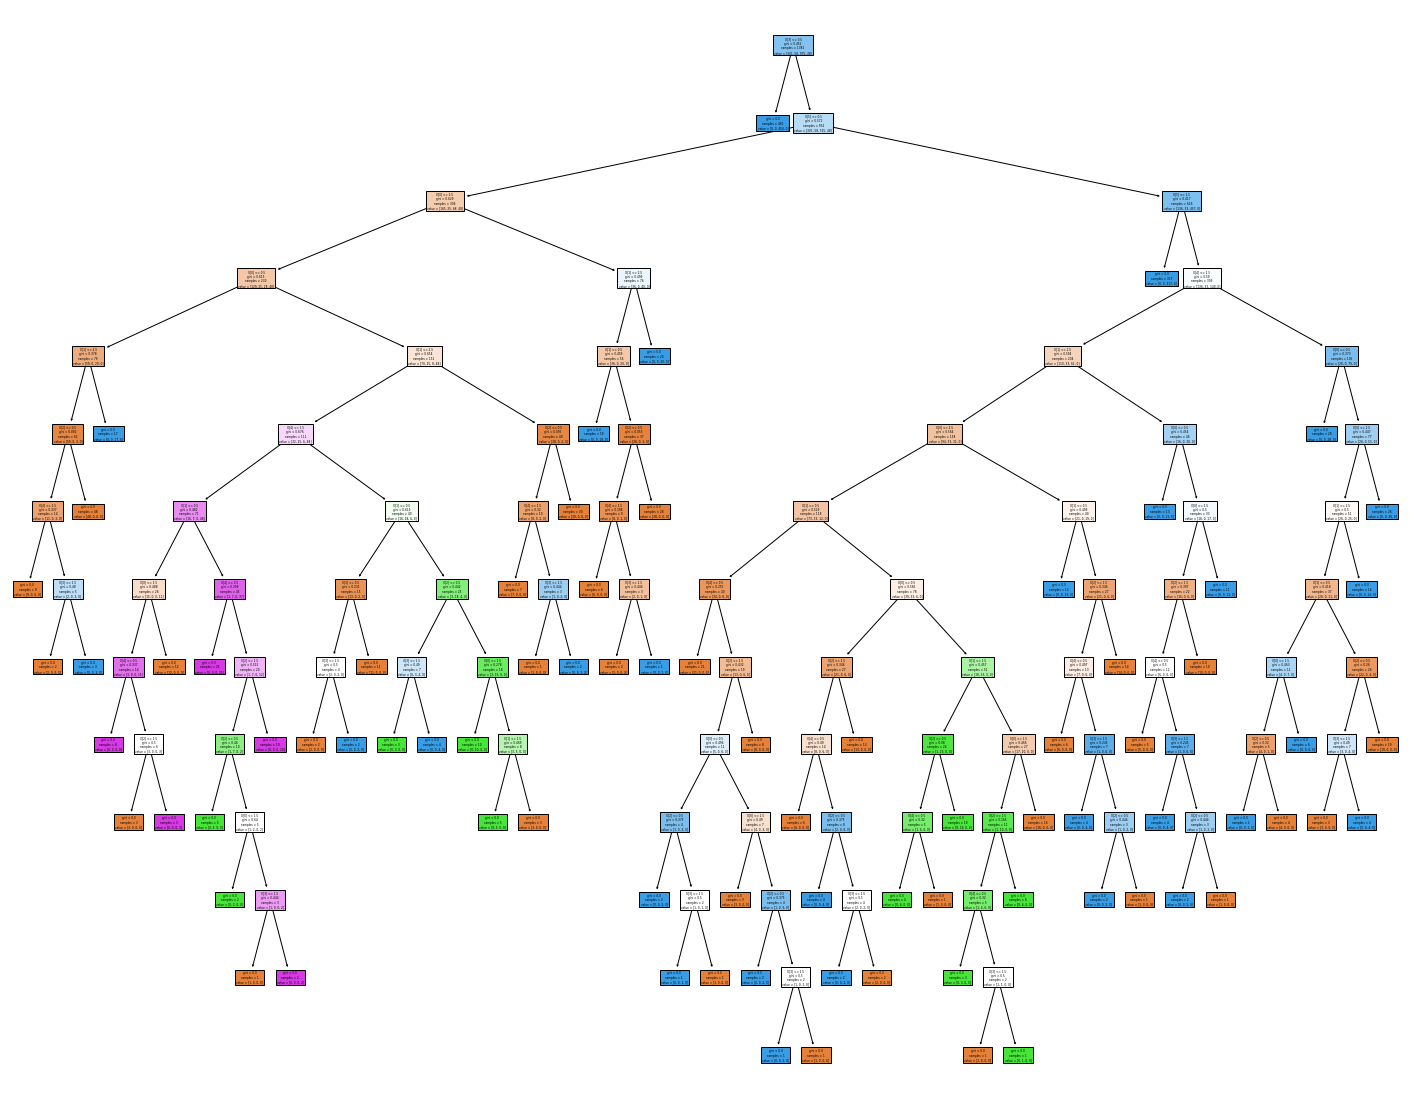

In [57]:
plotting(model)

#### Ordinal Encoder

In [58]:
X_train_enc_label,X_test_enc_label,X_inverse_label = prepare_inputs(X_train,X_test,ce.OrdinalEncoder)
y_train_enc_label,y_test_enc_label, y_inverse_label = prepare_outputs(y_train,y_test)
model = Make_Model(X_train_enc_label,y_train_enc_label)
get_analisis(model, X_train_enc_label)

el nombre de nodes es:  211
-----------------------------------------------------------------------------------
El nom de fulles que te aquest model es:  106
-----------------------------------------------------------------------------------
El ratio de nodes fulla respecte al total es 0.5023696682464455
-----------------------------------------------------------------------------------
 La importancia que li dona a les feautures es la següent:
dict_items([('persons', 0.24506023990384623), ('safety', 0.23060904361645457), ('lug_boot', 0.17272061617566467), ('maint', 0.14048981615455147), ('buying', 0.1327788680103093), ('doors', 0.07834141613917375)])
-----------------------------------------------------------------------------------
Les feautures més importants són:
['persons', 'safety', 'lug_boot']
-----------------------------------------------------------------------------------
El desenvolupament del fill dret es; 
[  1   2   3   4  -1   6   7   8  -1  10  11  -1  13  -1  -1  -1  

La seva principal ventatge es la senzillesa, ja que simplement assigna numeros del 0 al n-1 als membres de les n classes. Per contra, la assignació la fa en l'ordre en que troba les dades, cosa que en certa mesura dona un ordre a les dades (i això pot portar conseqüencies no desitjades).

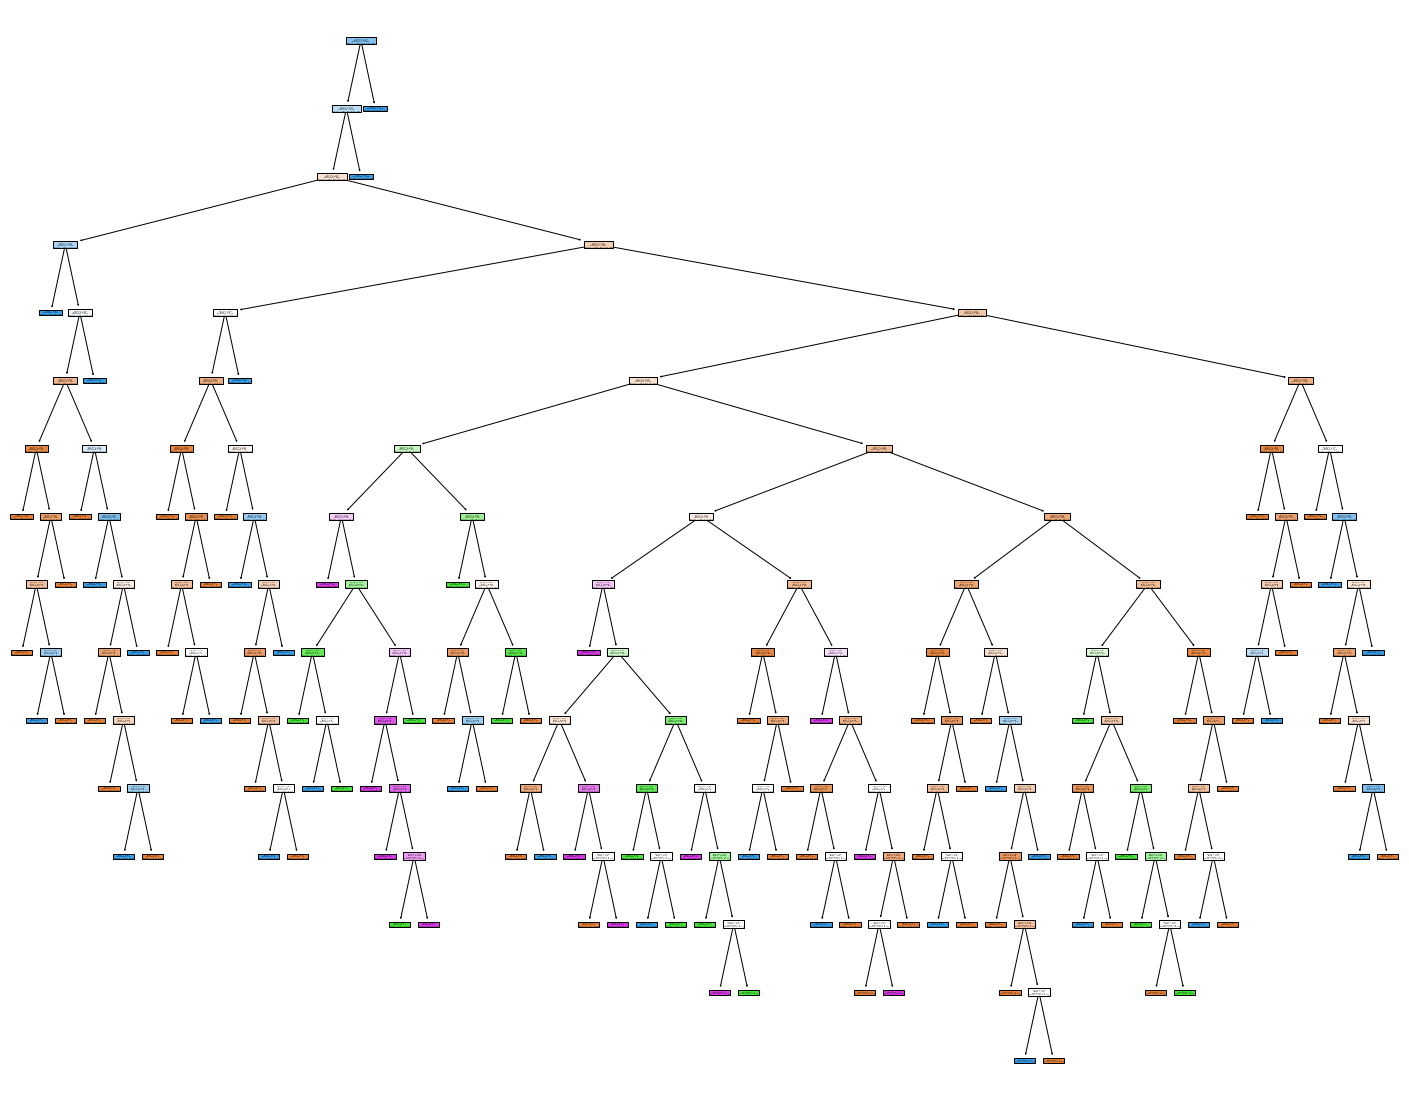

In [59]:
plotting(model)

### One Hot

In [60]:
X_train_enc_label,X_test_enc_label,X_inverse_label = prepare_inputs(X_train,X_test,ce.OneHotEncoder)
y_train_enc_label,y_test_enc_label, y_inverse_label = prepare_outputs(y_train,y_test)
model = Make_Model(X_train_enc_label,y_train_enc_label)
get_analisis(model, X_train_enc_label)

el nombre de nodes es:  171
-----------------------------------------------------------------------------------
El nom de fulles que te aquest model es:  86
-----------------------------------------------------------------------------------
El ratio de nodes fulla respecte al total es 0.5029239766081871
-----------------------------------------------------------------------------------
 La importancia que li dona a les feautures es la següent:
dict_items([('persons_3', 0.22259626197876026), ('safety_3', 0.15589834988646897), ('maint_4', 0.0825400918888503), ('lug_boot_2', 0.07465046738995168), ('buying_3', 0.07134811236044392), ('doors_4', 0.05320516985239663), ('safety_1', 0.04941651920033201), ('buying_2', 0.048403212659355224), ('safety_2', 0.041275163081291595), ('maint_1', 0.03802047899700917), ('buying_4', 0.03380440226494246), ('maint_2', 0.032942363614668374), ('persons_2', 0.021175746801275465), ('doors_2', 0.0172105367412599), ('lug_boot_3', 0.01605861798855406), ('maint_3', 

In [61]:
display(X_train_enc_label)

,buying_1,buying_2,buying_3,buying_4,maint_1,maint_2,maint_3,maint_4,doors_1,doors_2,doors_3,doors_4,persons_1,persons_2,persons_3,lug_boot_1,lug_boot_2,lug_boot_3,safety_1,safety_2,safety_3
107,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
901,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1709,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
706,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0
678,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0
1294,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
860,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
1459,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0


Aquest encoding ha augmentat el nombre d'atributs de tal manera que els ha deixat en la form attribut_x. On _x es la dimensió del atribut. SI abans hi habia 4 possibilitats per buying ara cada entrada de buying es representa amb un vector de 3 zeros i un 1 en el que la posició on estigui el 1 indica la classe de la entrada. Soluciona el problema previament esmentat de la necessitat per part de l'atribut de pertanyer a una serie ordinal. Per altra banda requereix un augment en el consum de memoria.

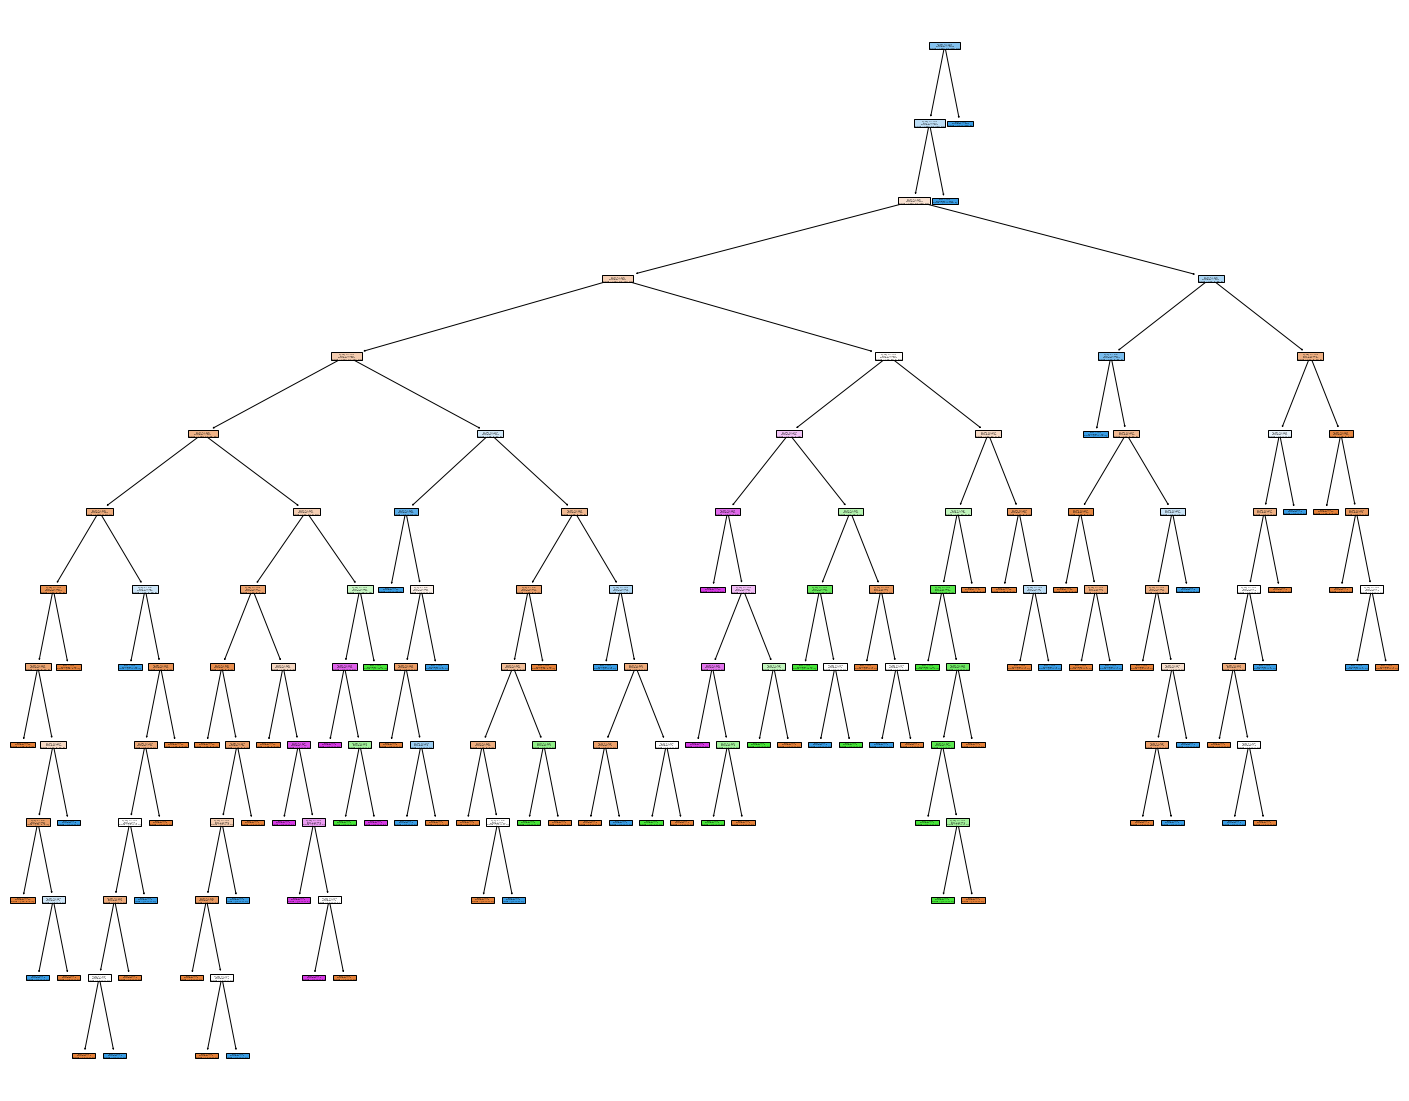

In [62]:
plotting(model)

## B. Selecció de mesures d'atributs
El principal repte en la implementació de l'arbre de decisions és identificar els atributs que considerem com a node arrel i cada nivell. Aquest procés es coneix com a **selecció d’atributs**. Hi ha diferents mesures de selecció d’atributs per identificar l’atribut que es pot considerar com el node arrel de cada nivell. Les 2 mesures més populars:

### Guany d'informació (entropy)

En utilitzar el guany d’informació com a criteri, intentem estimar la informació que conté cada atribut. Per entendre aquest concepte, hem de conèixer el que significa l'**Entropia**.

L’entropia mesura la impuresa del conjunt de dades donat. A Física i Matemàtiques, l’entropia es coneix com l’atzar o incertesa d’una variable aleatòria $X$. En teoria de la informació, es refereix a la impuresa d’un grup d’exemples. **El guany d'informació** és la disminució de l'entropia. El guany d'informació calcula la diferència entre l'entropia abans de la divisió i l'entropia mitjana després de la divisió del conjunt de dades en funció dels valors d'atribut donats.

L’entropia es representa amb la següent fórmula:

$$ Entropy = \sum_{i=1}^{C} -p_i * log_2(p_i) $$

Aquí, $c$ és el nombre de classes i $p_i$ és la probabilitat associada a la classe $i$.

L'algorisme de l'arbre de decisions ID3 (dicotomitzador iteratiu) utilitza l'entropia per calcular el guany d'informació. Per tant, calculant la disminució de la **mesura d’entropia** de cada atribut podem calcular el seu guany d’informació. L'atribut amb el guany d'informació més alt es tria com a atribut de divisió al node.


### Índex Gini

Una altra mesura de selecció d’atributs que utilitza **CART (arbres categòrics i de regressió)** és el **índex Gini**. 

L'índex de Gini es representa així:

$$ Gini = 1 - \sum_{i=1}^{C} (p_i)^2 $$

Aquí, de nou $c$ és el nombre de classes i $p_i$ és la probabilitat associada a la classe $i$.

L'índex de Gini diu que, si seleccionem a l'atzar dos ítems d'una població, han de ser de la mateixa classe i la probabilitat d'això és d'1 si la població és pura.

En cas d’un atribut de valor discret, el subconjunt que dóna l’índex de gini mínim per a l’escollit es selecciona com a atribut de divisió. En el cas d’atributs de valor continu, l’estratègia consisteix a seleccionar cada parell de valors adjacents com a possible punt de divisió i punt amb un índex de gini més petit triat com a punt de divisió. L’atribut amb índex Gini mínim s’escull com a atribut de divisió.

Com a norma general, s’utilitza el **guany d’informació** com a criteri quan els atributs són categòrics i que el **índex Gini** quan s’assumeixen que els atributs són continus, però ambdós es fan servir a sklearn indistintament.

Example https://analyticsindiamag.com/understanding-the-maths-behind-the-gini-impurity-method-for-decision-tree-split/

### Preguntes

1. Busca els millors hiperparametres per crear un arbre de decisió utilitzant com a criteri el guany d'entropia.
2. Busca els millors hiperparametres per crear un arbre de decisió utilitzant com a criteri la impuritat de Gini.
3. S'assemblen els arbres resultants (visualment i en termes quantificables)? I la seva precisió en el conjunt de test, és similar?

### Entropy

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

X_train_enc_label,X_test_enc_label,X_inverse_label = prepare_inputs(X_train,X_test,LabelEncoder)
y_train_enc_label,y_test_enc_label, y_inverse_label = prepare_outputs(y_train,y_test)

n_components = list(range(1,X_train_enc_label.shape[1]+1,1))
criterion = ['entropy']
max_depth = [2,4,6,8,10,12]         
parameters= {'criterion':criterion,'max_depth' : max_depth,'splitter':["best","random"],'min_samples_split':[1,2,3,4,6,7]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, verbose=1, cv=3,n_jobs=14)

grid_search_cv.fit(X_train_enc_label,y_train_lab_enc)
estimator = grid_search_cv.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/home/carlos/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.77567512 0.69607973 0.77567512 0.69607973
 0.77567512 0.69607973 0.77567512 0.69607973 0.77567512 0.69607973
        nan        nan 0.82125971 0.79666289 0.82125971 0.79666289
 0.82125971 0.79666289 0.82125971 0.79666289 0.82125971 0.79666289
        nan        nan 0.87263982 0.86685686 0.87263982 0.86685686
 0.87263982 0.86685686 0.87263982 0.86685686 0.87263982 0.86685686
        nan        nan 0.93849697 0.93198623 0.93705083 0.93198623
 0.93705083 0.93198623 0.93705083 0.91751234 0.93705083 0.92039989
        nan        nan 0.97323242 0.95512905 0.96961395 0.9500613
 0.96672011 0.94355214 0.95658776 0.94210444 0.95080009 0.92835361
        nan        nan 0.97467541 0.95945959 0.96888931 0.96018894
 0.962377   0.95223364 0.95658776 0.94210601 0.94863089 0.93993209]
  warnings.warn(


In [69]:
print(f"Best accuracy for hyperparameters search over train is {estimator.score(X_train_enc_label,y_train_lab_enc)}")
print(f"Best accuracy for hyperparameters search over test is {estimator.score(X_test_enc_label,y_test_lab_enc)}")

Best accuracy for hyperparameters search over train is 0.9985528219971056
Best accuracy for hyperparameters search over test is 0.976878612716763


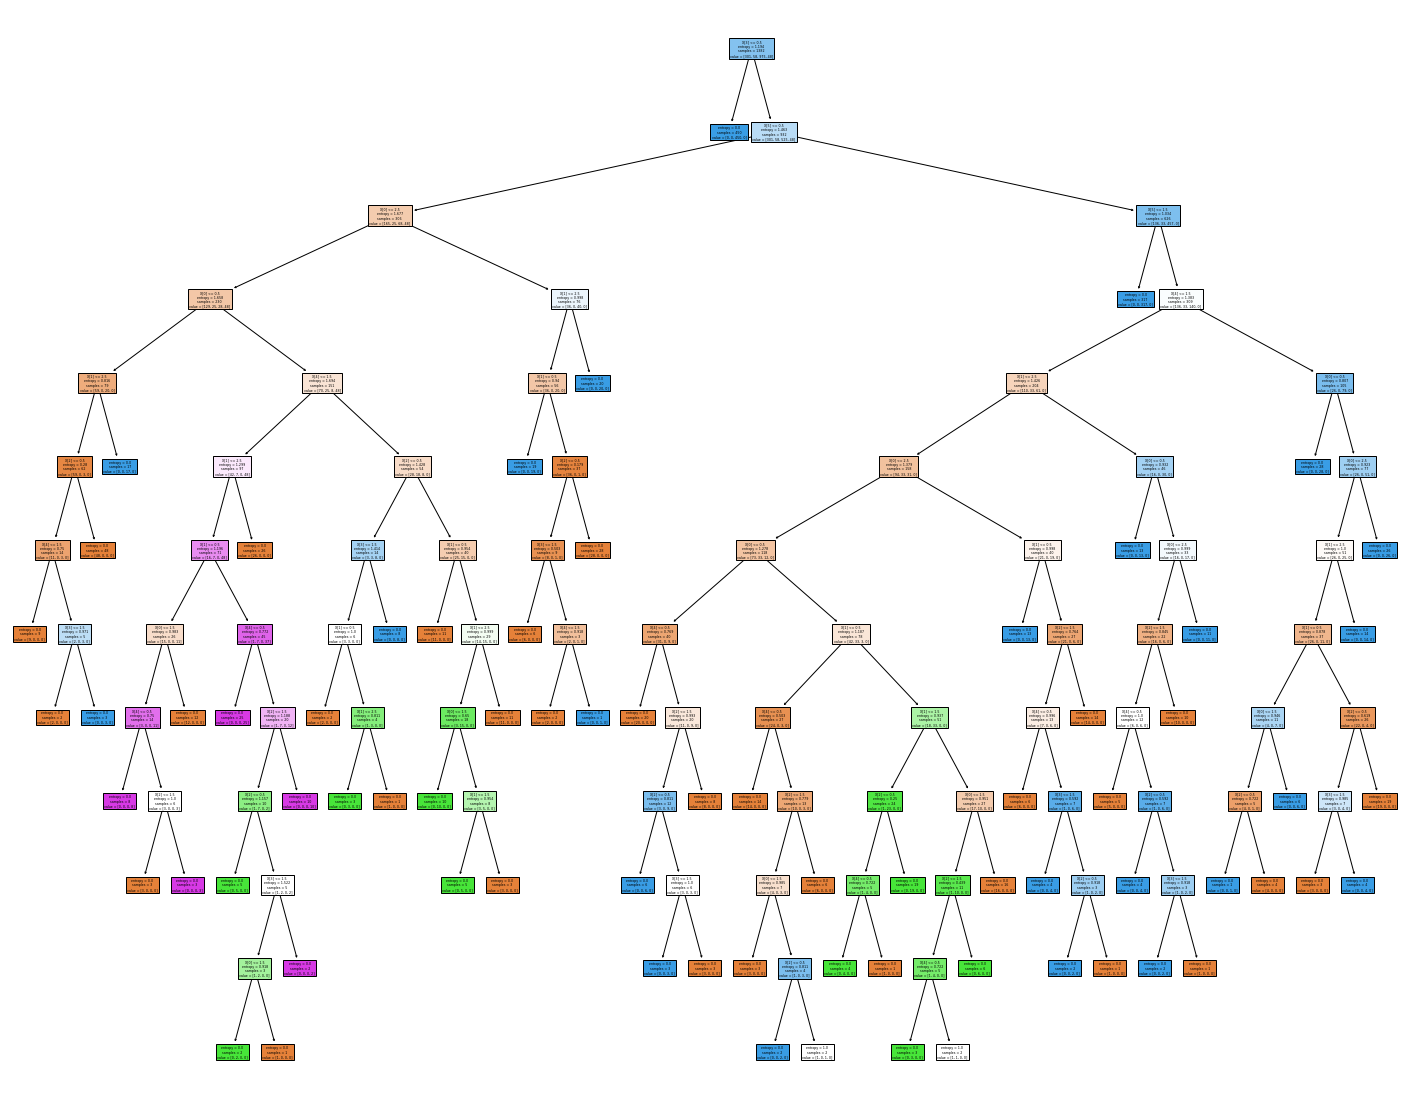

In [71]:
plotting(grid_search_cv.best_estimator_)

## Gini

In [72]:
X_train_enc_label,X_test_enc_label,X_inverse_label = prepare_inputs(X_train,X_test,LabelEncoder)
y_train_enc_label,y_test_enc_label, y_inverse_label = prepare_outputs(y_train,y_test)

n_components = list(range(1,X_train_enc_label.shape[1]+1,1))
criterion = ['gini']
max_depth = [2,4,6,8,10,12]         
parameters= {'criterion':criterion,'max_depth' : max_depth,'splitter':["best","random"],'min_samples_split':[1,2,3,4,6,7]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, verbose=1, cv=3,n_jobs=14)

grid_search_cv.fit(X_train_enc_label,y_train_lab_enc)
estimator = grid_search_cv.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/home/carlos/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.77567512 0.69607973 0.77567512 0.69607973
 0.77567512 0.69607973 0.77567512 0.69607973 0.77567512 0.69607973
        nan        nan 0.82125971 0.79738282 0.82125971 0.79738282
 0.82125971 0.79738282 0.82125971 0.79738282 0.82125971 0.79738282
        nan        nan 0.87553208 0.85311547 0.87553208 0.85311547
 0.87553208 0.85311547 0.87553208 0.8567308  0.87553208 0.8567308
        nan        nan 0.93849697 0.90161118 0.9377739  0.89944198
 0.9377739  0.89944198 0.93705083 0.89219875 0.9377739  0.89436795
        nan        nan 0.96599233 0.9392216  0.96237857 0.94718947
 0.96020466 0.93922003 0.95803232 0.91533843 0.95514005 0.92836933
        nan        nan 0.96744318 0.9428275  0.96526926 0.95152473
 0.95948159 0.93921217 0.95514005 0.93126788 0.95658619 0.93995096]
  warnings.warn(


In [73]:
print(f"Best accuracy for hyperparameters search over train is {estimator.score(X_train_enc_label,y_train_lab_enc)}")
print(f"Best accuracy for hyperparameters search over test is {estimator.score(X_test_enc_label,y_test_lab_enc)}")

Best accuracy for hyperparameters search over train is 0.9985528219971056
Best accuracy for hyperparameters search over test is 0.976878612716763


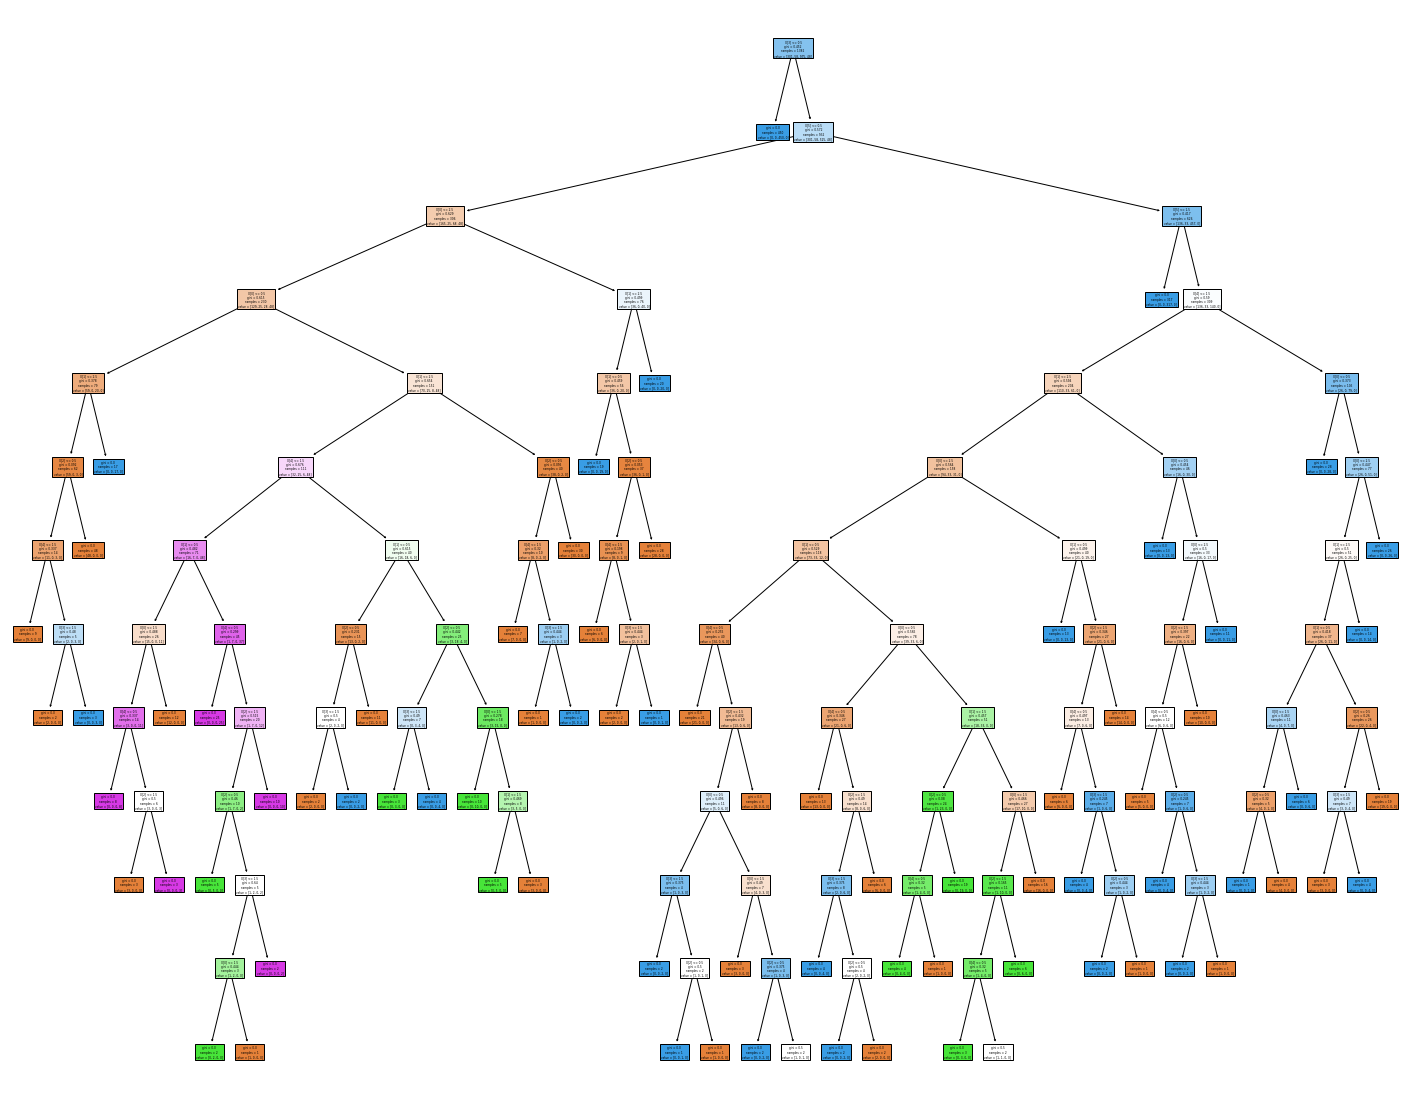

In [74]:
plotting(grid_search_cv.best_estimator_)

### Visiblement només es pot veure una mica la diferència en aquest cas entre el millor model amb gini i el millormodel amb l'entropy

### Teniu en compte que aquestos són ses meues execucions, a valtros us poden sortir valors diferents

si provem amb uns params diferents es pot veure més sa diferència

In [75]:
tree_para_en = {
    'criterion':['entropy'],
    "min_samples_split":[10,15,20],
    "splitter": ["best","random"],
    "min_samples_leaf": [4,6],
    "max_depth": [5,6,8,9],
    "max_features": (range(1, 5))
}

tree_para_gin = {
    "min_samples_split":[10,11,12,15,20],
    "splitter": ["best","random"],
    "min_samples_leaf": [4,6],
    "max_depth": [5,6,8,9],
    "max_features": (range(1, 5))
}

### Entropy round 2

In [76]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_para_en, verbose=1, cv=3,n_jobs=14)

grid_search_cv.fit(X_train_enc_label,y_train_lab_enc)
estimator = grid_search_cv.best_estimator_

Fitting 3 folds for each of 192 candidates, totalling 576 fits


In [77]:
print(f"Best accuracy for hyperparameters search over train is {estimator.score(X_train_enc_label,y_train_lab_enc)}")
print(f"Best accuracy for hyperparameters search over test is {estimator.score(X_test_enc_label,y_test_lab_enc)}")

Best accuracy for hyperparameters search over train is 0.9536903039073806
Best accuracy for hyperparameters search over test is 0.9364161849710982


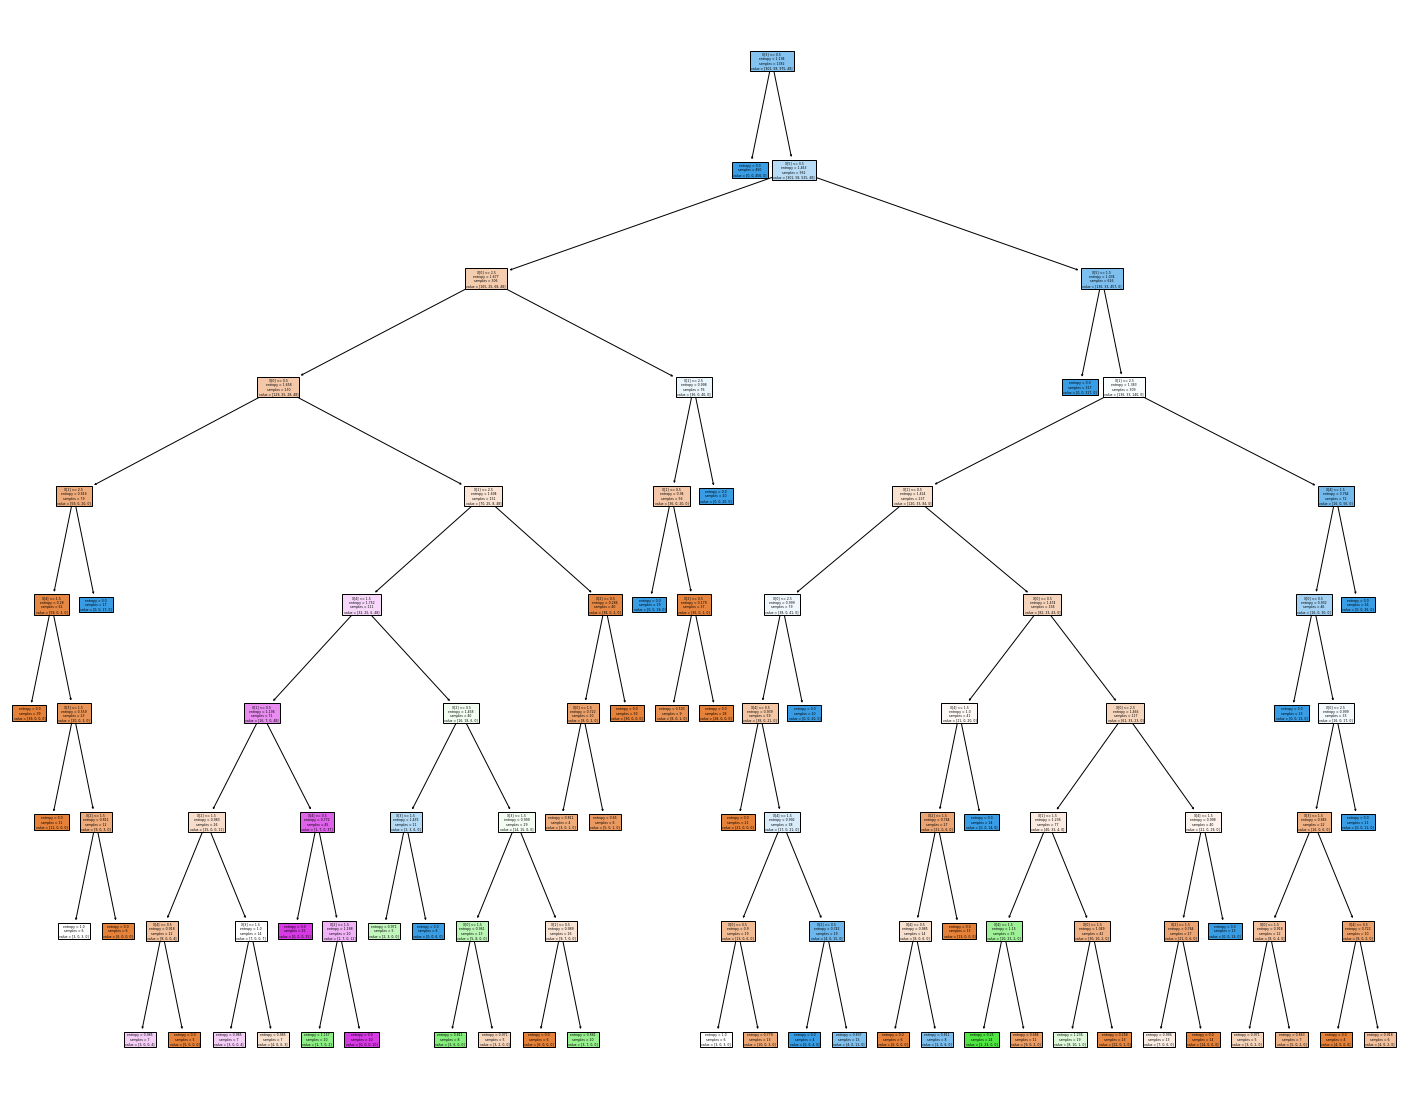

In [78]:
plotting(grid_search_cv.best_estimator_)

### Gini Round 2

In [79]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_para_gin, verbose=1, cv=3,n_jobs=14)

grid_search_cv.fit(X_train_enc_label,y_train_lab_enc)
estimator = grid_search_cv.best_estimator_

Fitting 3 folds for each of 320 candidates, totalling 960 fits


In [80]:
print(f"Best accuracy for hyperparameters search over train is {estimator.score(X_train_enc_label,y_train_lab_enc)}")
print(f"Best accuracy for hyperparameters search over test is {estimator.score(X_test_enc_label,y_test_lab_enc)}")

Best accuracy for hyperparameters search over train is 0.9109985528219972
Best accuracy for hyperparameters search over test is 0.8988439306358381


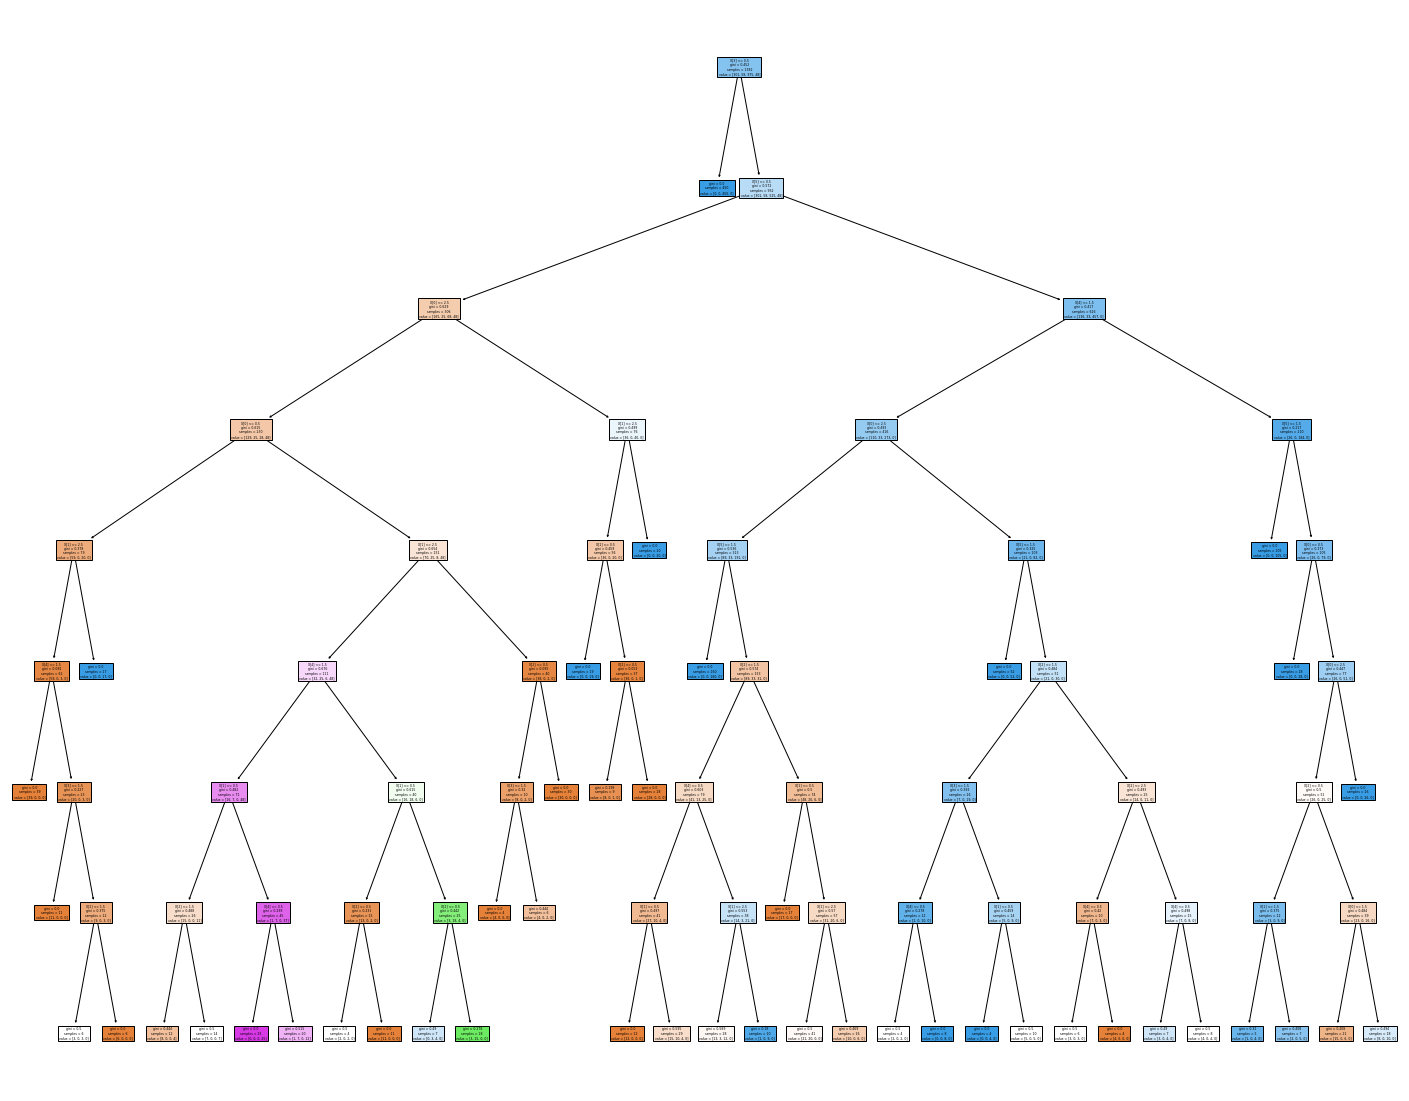

In [81]:
plotting(grid_search_cv.best_estimator_)

#### Aquí ja es veuen més notories ses diferències

## C. Pruning

L'overfitting és un problema comú quan es construeixen models d’arbres de decisions. El problema apareix quan l'algoritme continua aprofundint cada vegada més per reduir l'error del conjunt d'entrenament, però per contra, resulta que va augmentant l'error en el conjunt de test. Per tant, la precisió final del model será menor. Generalment passa quan es creen moltes branques a causa de valors atípics i irregularitats en les dades (o mal codificades) [Exemple del resultat de tenir Atributs mal codificats en un arbre de decisió](https://stackoverflow.com/questions/61217713/labelencoder-for-categorical-features/61217936).

Dos enfocaments que es poden utilitzar per evitar l'overfitting:

* **Poda prèvia**: aturem la construcció dels arbres abans d'arribar a la fulla final. Preferim no dividir un node si la seva mesura de bondat està per sota d’un valor llindar. Però és difícil triar un punt d’aturada adequat.

* **Post poda**: aprofundim cada vegada més en l’arbre per construir un arbre complet. Si l’arbre mostra problemes d'overfitting, la poda es fa com un pas posterior al aprenentatge. Mitjançant dades de validació creuada [cross validations], comprovem si ampliar un node comportarà una millora o no. Si mostra una millora, podem continuar ampliant aquest node. Però si mostra una reducció de la precisió, no s’hauria d’ampliar. Per tant, el node s’hauria de convertir en un node fulla.

### Preguntes

1. Amb els parametres del millor arbre de l'apartat anterior, realitza una poda prèvia. Com pots validar si ho estàs fent bé?
2. Realitza una poda posterior del arbre [Pista](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning). Busca que fa el paràmetre *ccp_alpha*
3. Compara els arbres resultants i els resultats que se'n obtenen. S'assemblen? Quina de les dues tècniques creus que s'adecua millor a la vostra base de dades? A part de visualment, compara'ls també quantificablement.


In [86]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score


## Previous Pode analisy and ablation

In [87]:

X_train_enc_label,X_test_enc_label,X_inverse_label = prepare_inputs(X_train,X_test,LabelEncoder)
y_train_enc_label,y_test_enc_label, y_inverse_label = prepare_outputs(y_train,y_test)

n_components = list(range(1,X_train_enc_label.shape[1]+1,1))
criterion = ['entropy']
max_depth = [2,4,6,8,10,12]         
parameters= {'criterion':criterion,'max_depth' : max_depth,'splitter':["best","random"],'min_samples_split':[1,2,3,4,6,7]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, verbose=1, cv=3,n_jobs=14)

grid_search_cv.fit(X_train_enc_label,y_train_lab_enc)
estimator = grid_search_cv.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/home/carlos/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.77567512 0.69607973 0.77567512 0.69607973
 0.77567512 0.69607973 0.77567512 0.69607973 0.77567512 0.69607973
        nan        nan 0.82125971 0.79666289 0.82125971 0.79666289
 0.82125971 0.79666289 0.82125971 0.79666289 0.82125971 0.79666289
        nan        nan 0.87263982 0.86685686 0.87263982 0.86685686
 0.87263982 0.86685686 0.87263982 0.86685686 0.87263982 0.86685686
        nan        nan 0.93849697 0.93198623 0.93705083 0.93198623
 0.93705083 0.93198623 0.93705083 0.91751234 0.93705083 0.92039989
        nan        nan 0.97323242 0.95512905 0.96961395 0.9500613
 0.96672011 0.94355214 0.95658776 0.94210444 0.95080009 0.92835361
        nan        nan 0.97467541 0.95945959 0.96888931 0.96018894
 0.962377   0.95223364 0.95658776 0.94210601 0.94863089 0.93993209]
  warnings.warn(


In [89]:
import copy
from sklearn.metrics import accuracy_score

new_params = copy.copy(grid_search_cv.best_params_)
new_params['min_impurity_decrease'] = 0.01
# suma ponderada dels inputs minima per a estar en una fulla
new_params['min_weight_fraction_leaf'] = 0.01

clf_pre_prunned= tree.DecisionTreeClassifier(random_state=23, **new_params)
model_pre_prunned = clf_pre_prunned.fit(X_train_enc_label, y_train_enc_label)


Y_train_pred = model_pre_prunned.predict(X_train_enc_label)
acc_pre_prunned = accuracy_score(y_train_enc_label, Y_train_pred)

print("La accuracy sobre el conjunt de training del model amb pre-prunning és", acc_pre_prunned)

Y_test_pred = model_pre_prunned.predict(X_test_enc_label)
acc_pre_prunned = accuracy_score(y_test_enc_label, Y_test_pred)

print("La accuracy sobre el conjunt de test del model amb pre-prunning és", acc_pre_prunned)

La accuracy sobre el conjunt de training del model amb pre-prunning és 0.9073806078147613
La accuracy sobre el conjunt de test del model amb pre-prunning és 0.8786127167630058


In [98]:
def previous_pode(X, y_train_lab_enc, X_t, y_test_lab_enc):
    n_components = list(range(1,X.shape[1]+1,1))
    criterion = ['gini']
    max_depth = [2,4,6,8,10,12]     
    

    
    min_samples_leaf = [1,2,3,4,5]

    min_samples_split = [1,2,3,4,5]

    max_leaf_nodes = (np.linspace(2,100,10)).astype(int)
    min_impurity_decrease = [0,0.001,0.0001,0.00001]
    accs = []
    modells = []
    infos = []
    for w in min_samples_leaf:
        for b in min_samples_split:
            for x in max_depth:
                for y in max_leaf_nodes:
                    for t in min_impurity_decrease:
                        clf_ = DecisionTreeClassifier(random_state=42,max_depth=x,max_leaf_nodes=y,min_impurity_decrease=t)
                        clf_.fit(X,y_train_lab_enc)
                        accs.append(clf_.score(X_t,y_test_lab_enc))
                        modells.append(clf_)
                        infos.append(info_of_tree(clf_))
                        print(f"Test score is {clf_.score(X_t,y_test_lab_enc)}")
                
    return accs,modells,infos

In [104]:
acc,models,infos = previous_pode(X_train_enc_label, y_train_enc_label, X_test_enc_label, y_test_enc_label)

Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score

Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score

Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score

Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score

Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score

Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 

Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.8236994219653179
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 

Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is

Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score i

Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.9190751445086706
Test score is 0.9190751445086706
Test score is 0.9190751445086706
Test score is 0.9190751445086706
Test score is 0.9421965317919075
Test score is 0.9450867052023122
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9479768786127167
Test score is 

Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.8930635838150289
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.9190751445086706
Test score is 0.9190751445086706
Test score is 0.9190751445086706
Test score is 0.9190751445086706
Test score is 0.9421965317919075
Test score is 0.9450867052023122
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 

Test score is 0.884393063583815
Test score is 0.9190751445086706
Test score is 0.9190751445086706
Test score is 0.9190751445086706
Test score is 0.9190751445086706
Test score is 0.9421965317919075
Test score is 0.9450867052023122
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score 

Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is

Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9421965317919075
Test score is 0.94

Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9450867052023122
Test score is 0.9393063583815029
Test score is 0.9450867052023122
Test score is 0.9450867052023122
Test score is 0.953757225433526
Test score is 0.9393063583815029
Test score is 0.953757225433526
Test score is 0.9537

Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9450867052023122
Test score is 0.9393063583815029
Test score is 0.9450867052023122
Test score is 0.9450867052023122
Test score is 0.953757225433526
Test score is 0.9393063583815029
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9393063583815029
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9393063583815029
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9393063583815029
Test score is 0.95375722

Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9450867052023122
Test score is 0.9393063583815029
Test score is 0.9450867052023122
Test score is 0.9450867052023122
Test score is 0.953757225433526
Test score is 0.9393063583815029
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9393063583815029
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9393063583815029
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9393063583815029
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.8988439306

Test score is 0.953757225433526
Test score is 0.9393063583815029
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9393063583815029
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9393063583815029
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.94219653179

Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.884393063583815
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9450867052023122
Test score is 0.9364161849710982
Test score is 0.9450867052023122
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9364161849710982
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9710

Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.8988439306358381
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.953757225433526
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9421965317919075
Test score is 0.9450867052023122
Test score is 0.9364161849710982
Test score is 0.9450867052023122
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9364161849710982
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9710982658959537
Test score is 0.9364161849710982
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.9364161849710982
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.9364161849710982
Test score is 0.9710982658959537
Test score is 

Test score is 0.9421965317919075
Test score is 0.9450867052023122
Test score is 0.9364161849710982
Test score is 0.9450867052023122
Test score is 0.9450867052023122
Test score is 0.9479768786127167
Test score is 0.9364161849710982
Test score is 0.9479768786127167
Test score is 0.9479768786127167
Test score is 0.9710982658959537
Test score is 0.9364161849710982
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.9364161849710982
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.9364161849710982
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score

Test score is 0.9364161849710982
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.9364161849710982
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.9364161849710982
Test score is 0.9710982658959537
Test score is 0.9710982658959537
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score

Test score is 0.9710982658959537
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score

Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.7427745664739884
Test score is 0.6791907514450867
Test score is 0.6791907514450867
Test score

In [106]:
df = df= pd.concat(infos)
df['acc'] = acc 
df['models'] = np.arange(len(acc))

df = df[[x for x in df.columns if (not df[x].dtype=='O') or (x in ['max_node_page_rank','most_centered_node','ratio_total_leaves'])]]
df = df.drop_duplicates(subset=[x for x in df.columns.difference(['models'])]).reset_index()

df

,index,capacity,max_depth,max_n_classes,n_classes,n_features,n_leaves,n_outputs,node_count,ratio_total_leaves,mean_leaf_depth,main_attr_col_idx,main_attr_importance,node_impurity_mean,max_node_page_rank,most_centered_node,acc,models
0,0,3,1,4,4,6,2,1,3,0.6666666666666666%,2.000,4,1.000,691.000,0,0,0.679,0
1,0,5,2,4,4,6,3,1,5,0.6%,2.667,4,0.535,460.667,2,2,0.743,4
2,0,15,4,4,4,6,8,1,15,0.5333333333333333%,4.500,6,0.511,172.750,6,2,0.824,44
3,0,23,6,4,4,6,12,1,23,0.5217391304347826%,5.417,6,0.402,115.167,6,3,0.884,84
4,0,39,6,4,4,6,20,1,39,0.5128205128205128%,6.350,6,0.367,69.100,22,3,0.893,88
5,0,33,6,4,4,6,17,1,33,0.5151515151515151%,6.059,6,0.369,81.294,15,3,0.893,89
6,0,45,8,4,4,6,23,1,45,0.5111111111111111%,6.957,6,0.322,60.087,41,3,0.919,128
7,0,67,8,4,4,6,34,1,67,0.5074626865671642%,7.765,6,0.301,40.647,43,6,0.942,132
8,0,63,8,4,4,6,32,1,63,0.5079365079365079%,7.719,6,0.303,43.188,43,6,0.945,133
9,0,81,8,4,4,6,41,1,81,0.5061728395061729%,8.000,6,0.297,33.707,78,3,0.948,136


## Post poda

[0.9739884393063584, 0.9508670520231214, 0.953757225433526, 0.9508670520231214, 0.9508670520231214, 0.9508670520231214, 0.9479768786127167, 0.9479768786127167, 0.9479768786127167, 0.9479768786127167, 0.9479768786127167, 0.9450867052023122, 0.9479768786127167, 0.9479768786127167, 0.9479768786127167, 0.9479768786127167, 0.9479768786127167, 0.9479768786127167, 0.9190751445086706, 0.9190751445086706, 0.9190751445086706, 0.9190751445086706, 0.9190751445086706, 0.8872832369942196, 0.8786127167630058, 0.8786127167630058, 0.884393063583815, 0.884393063583815, 0.884393063583815, 0.884393063583815, 0.884393063583815, 0.8757225433526011, 0.8121387283236994, 0.8121387283236994, 0.8121387283236994, 0.7427745664739884, 0.7427745664739884, 0.7427745664739884, 0.7427745664739884, 0.7427745664739884, 0.7427745664739884, 0.7427745664739884, 0.7427745664739884, 0.7427745664739884, 0.6791907514450867, 0.6791907514450867]


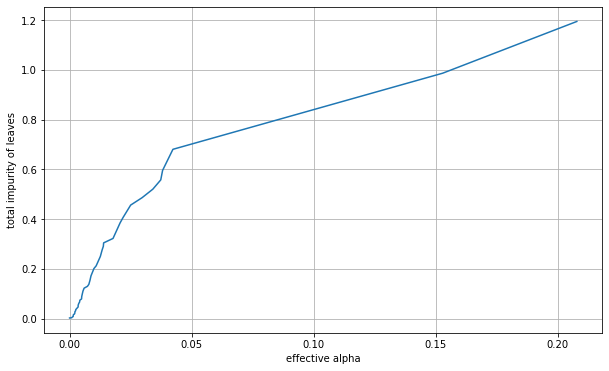

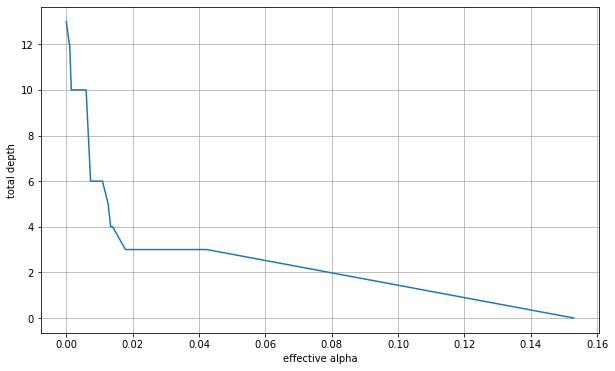

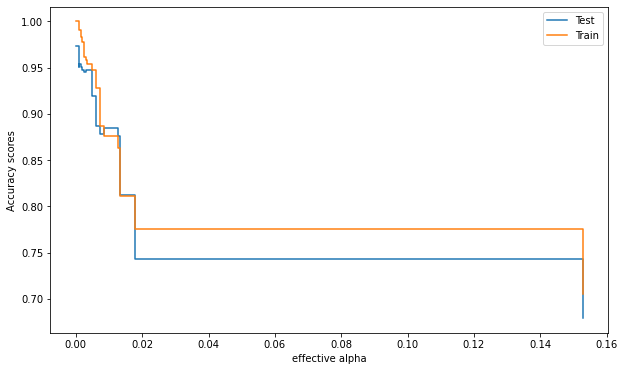

In [110]:
from sklearn.tree._tree import TREE_LEAF
import copy
def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are children, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

# start pruning from the root
clf =estimator #copy.deepcopy(grid_search_cv.best_estimator_)
data = {'Threshold':[],'Accuracy_train':[],'Accuracy_test':[],'prunned':[]}
path = clf.cost_complexity_pruning_path(X_train_enc_label, y_train_enc_label)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.grid()
clfs = []

for ccp_alpha in ccp_alphas:
    clf_ = DecisionTreeClassifier(ccp_alpha=ccp_alpha,random_state=42)
    clf_.fit(X_train_enc_label, y_train_enc_label)
    clfs.append(clf_)

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test_enc_label, clf.predict(X_test_enc_label)) for clf in clfs]
print(acc_scores)
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1],label='Test',drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

acc_scores2 = [accuracy_score(y_train_enc_label, clf_.predict(X_train_enc_label)) for clf_ in clfs]

tree_depths = [clf_.tree_.max_depth for clf_ in clfs]
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores2[:-1],label='Train',drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")
plt.legend()
interesant_to_analyze = [clf_ for clf_ in clfs]

### Comparant podes

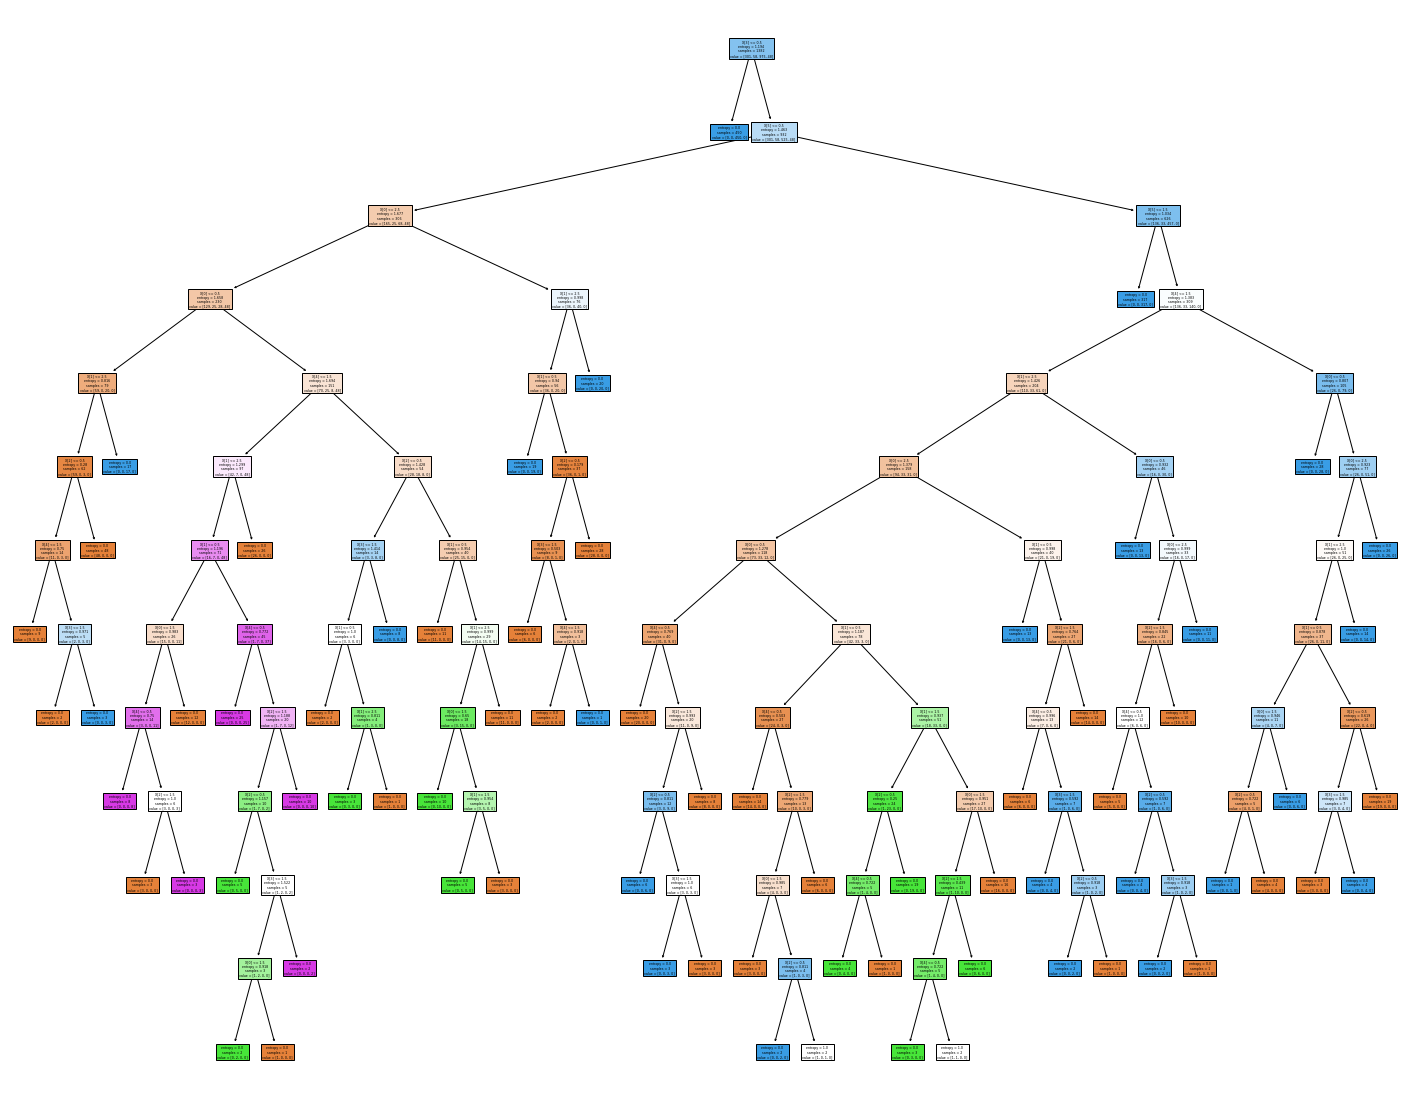

In [112]:
# Arbre Inicial
info = info_of_tree(clf)
plotting(clf)

### Poda Previa 

Degut a que hem fet una busqueda exhaustiva es tenen una gran combinació d'arbres; es farà un primer filtre basant-se en la acuracy i la capacitat.

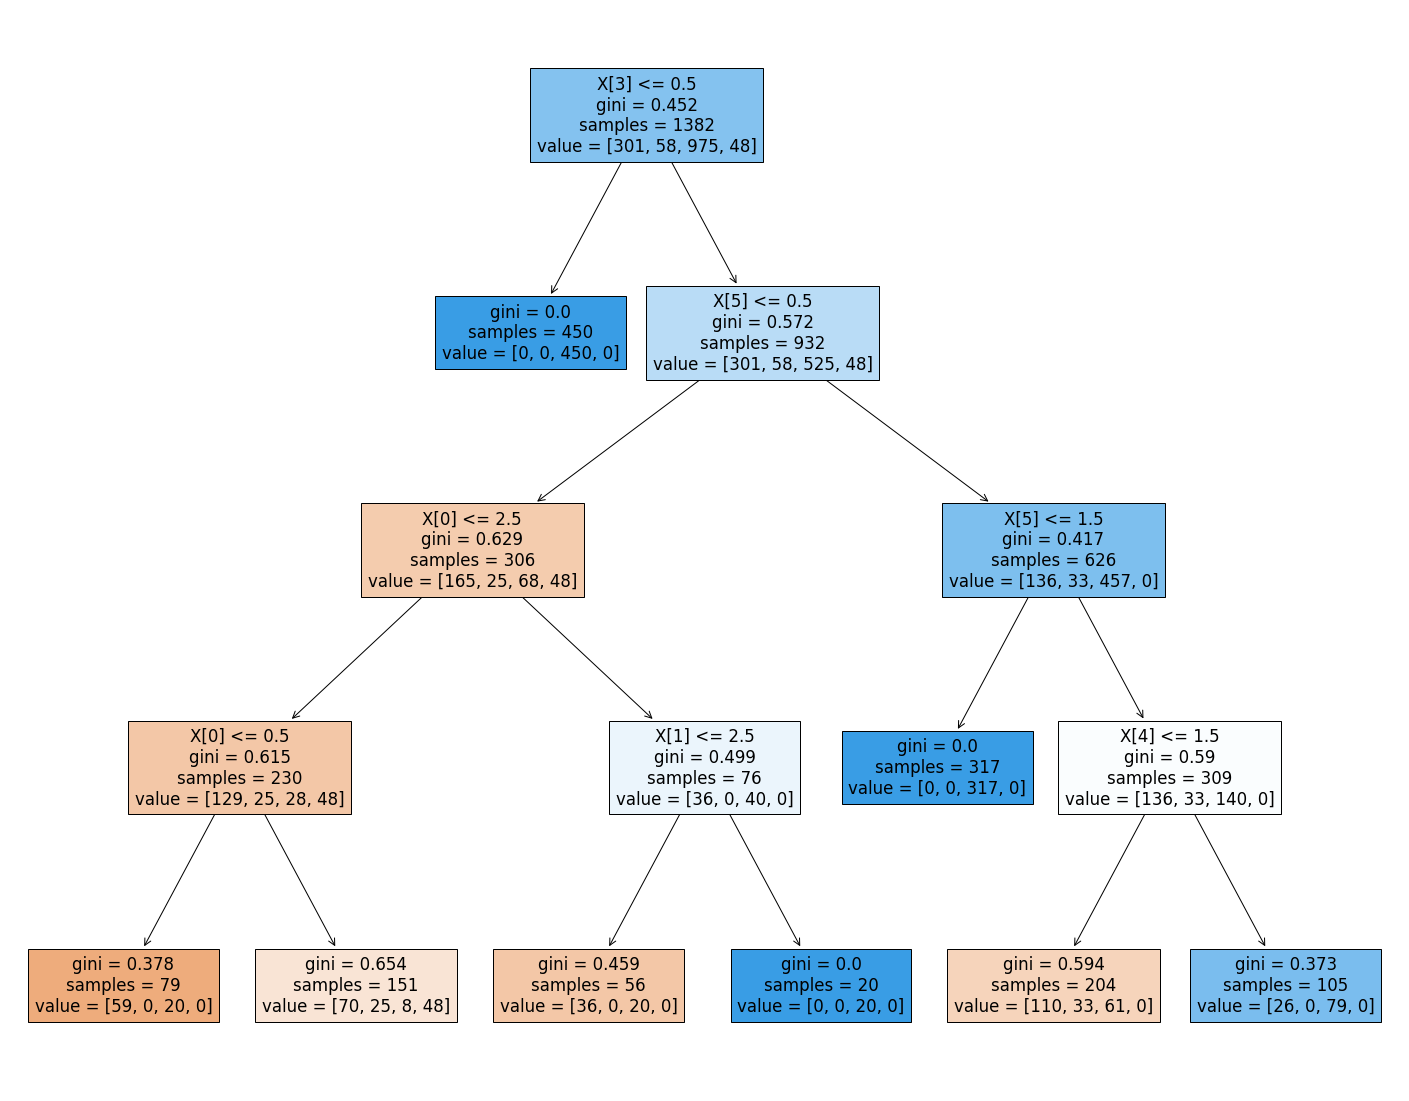

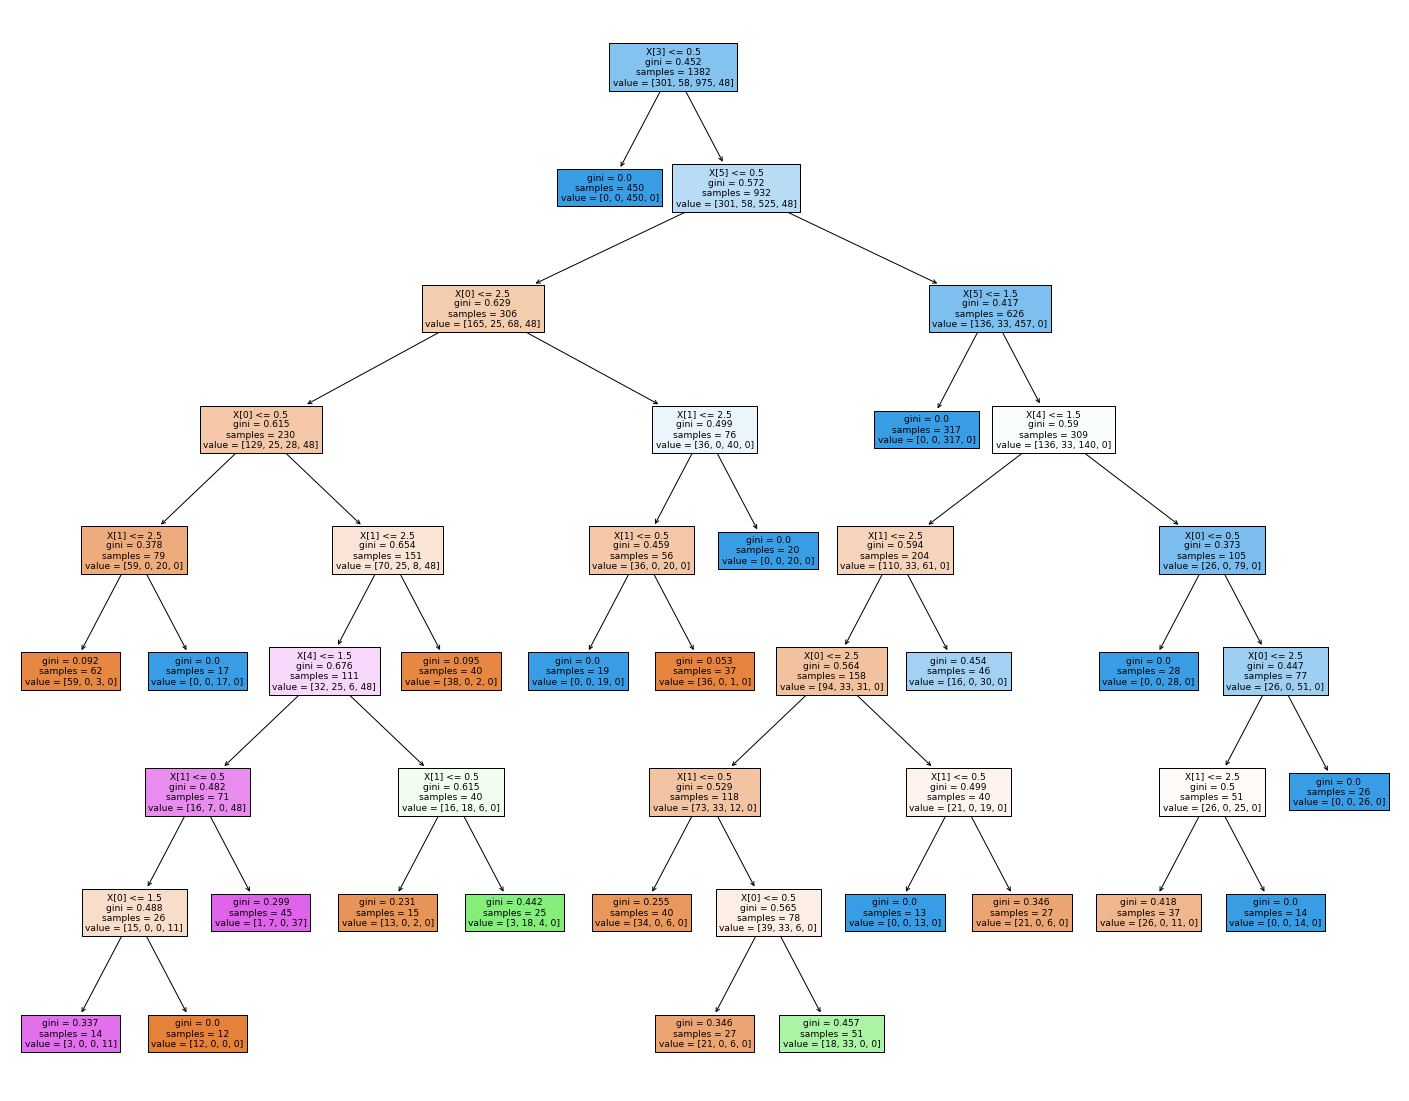

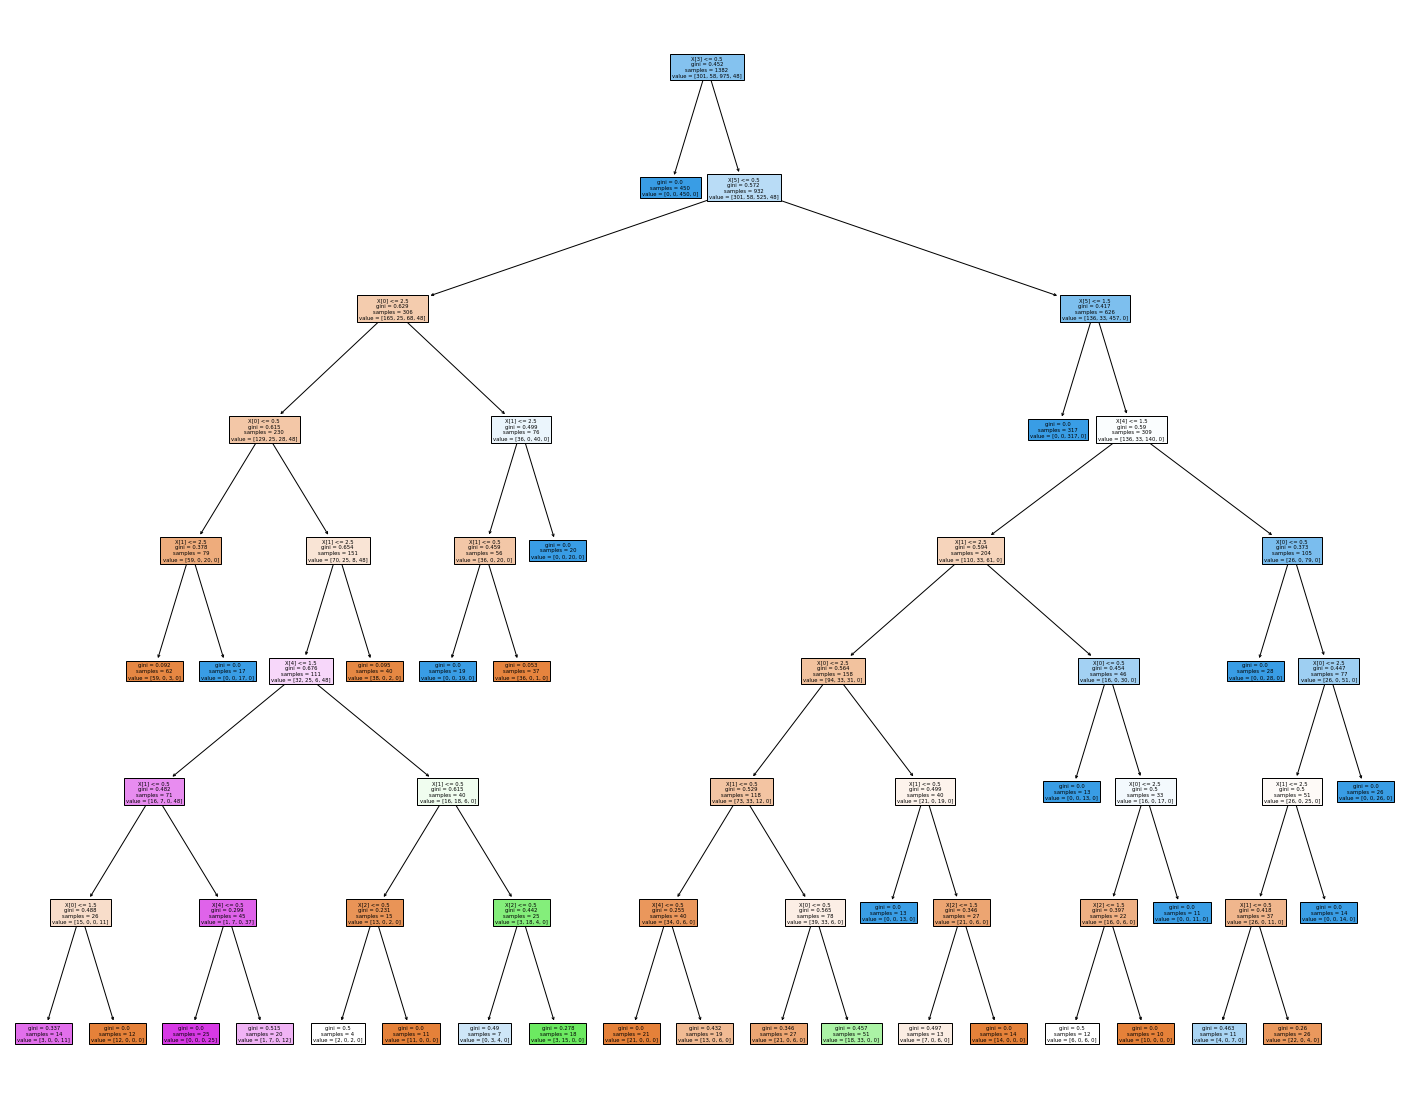

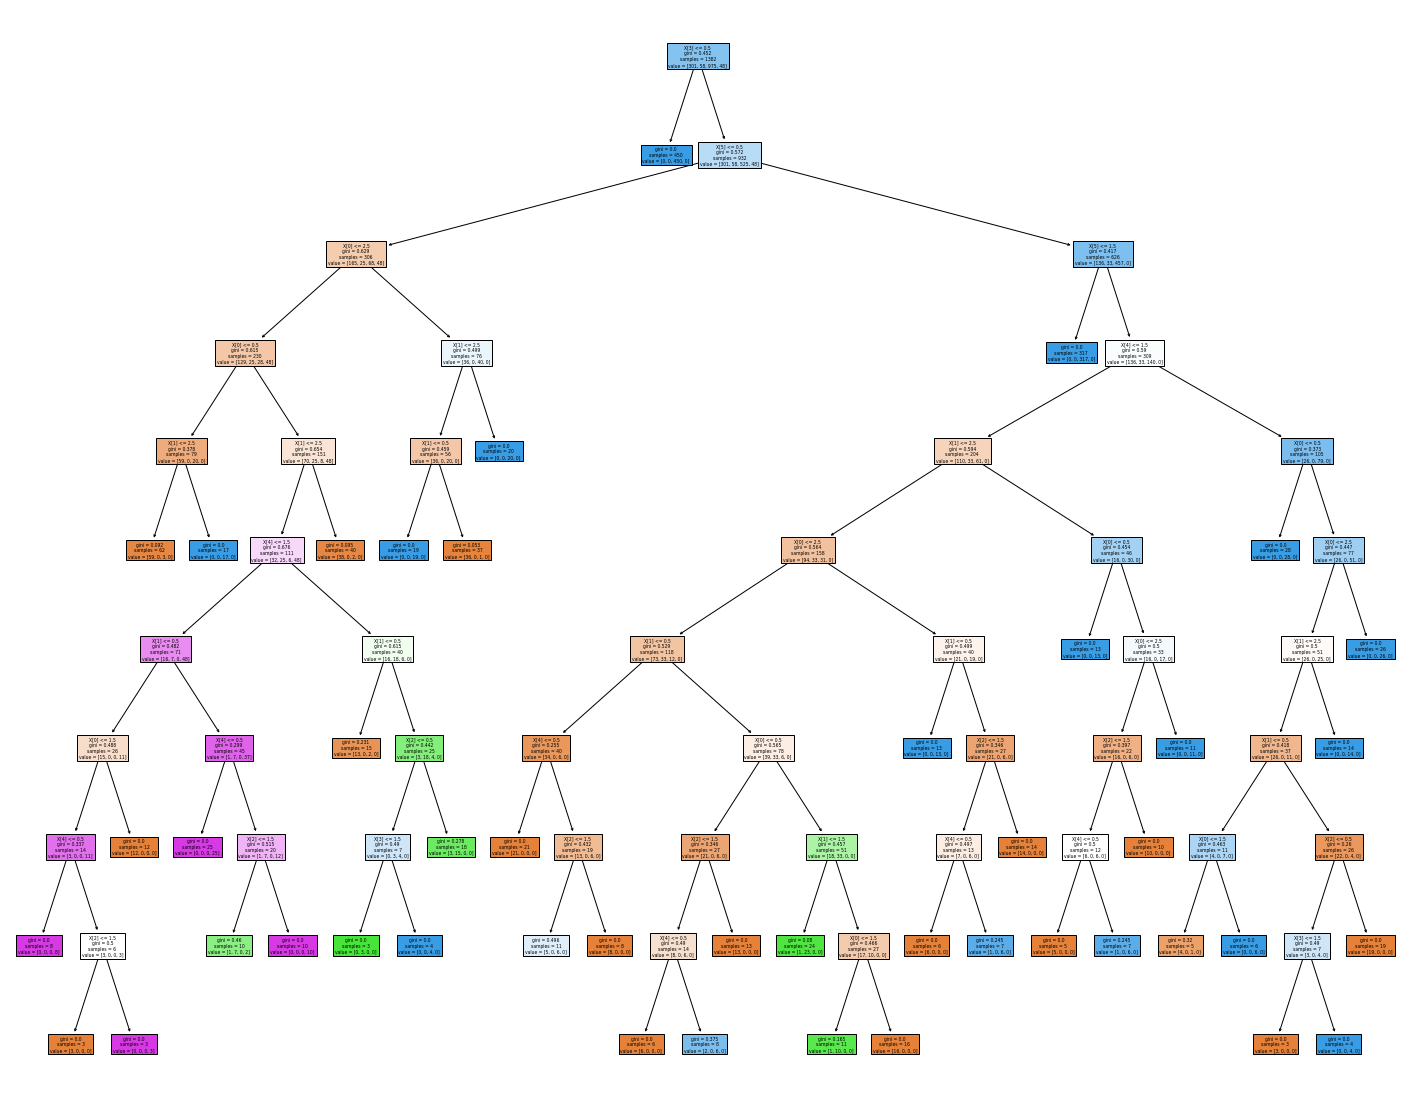

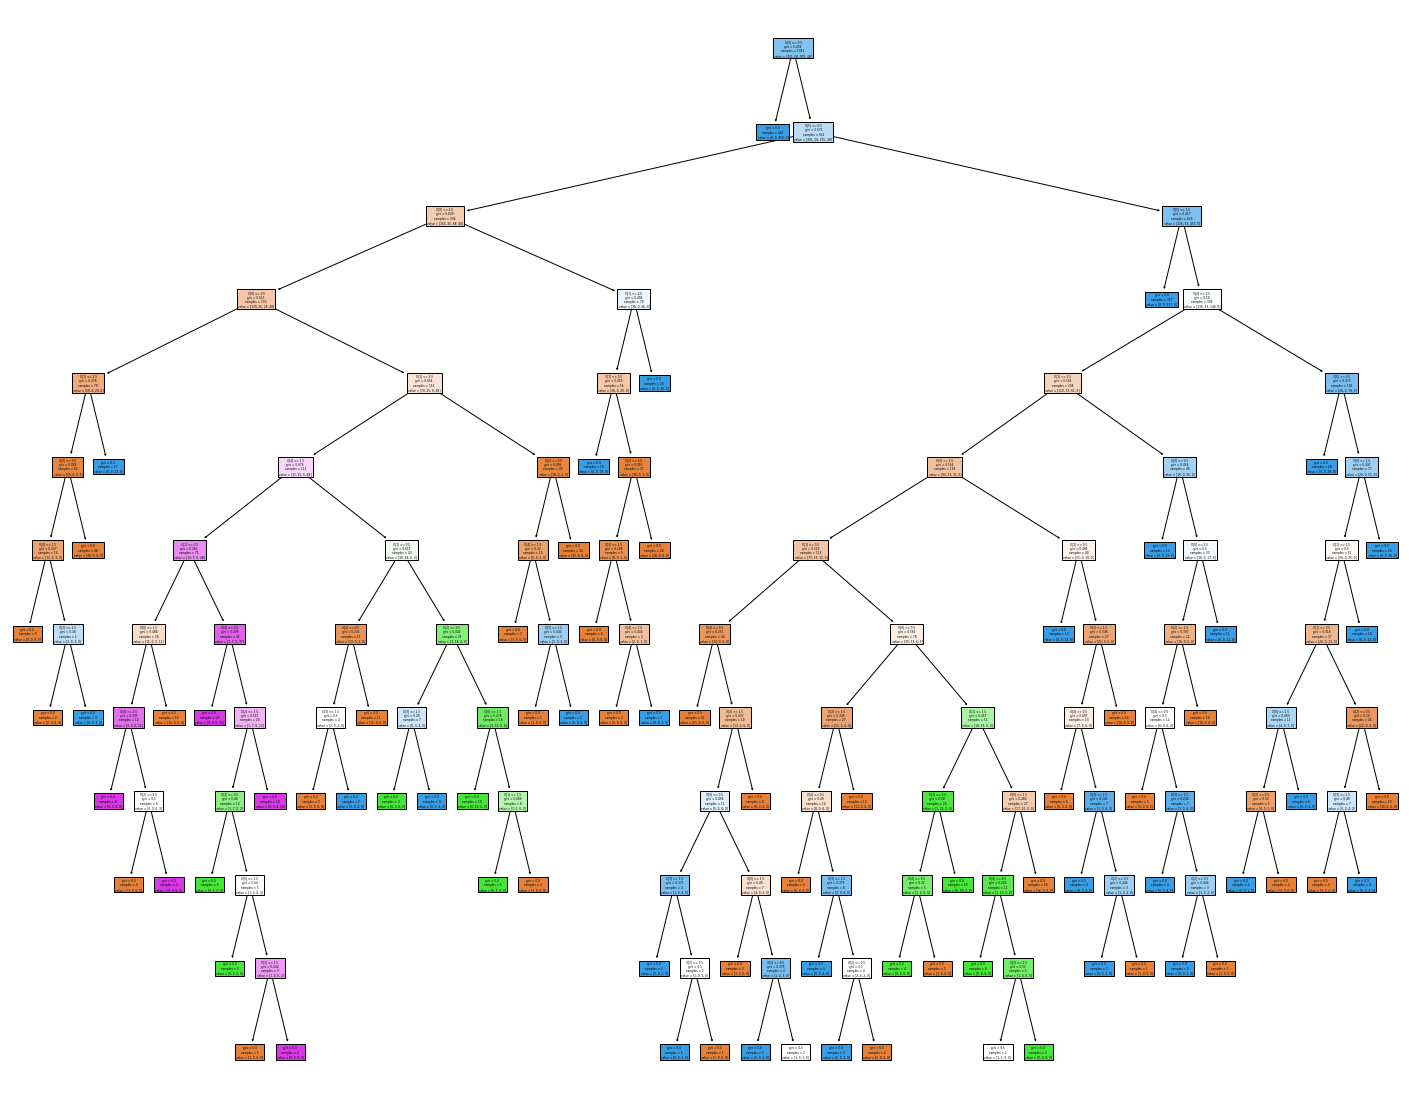

In [113]:
df[['acc','capacity','models']]

index = [2,6,8,12,19]
interessant = pd.DataFrame([df.loc[x] for x in index])
models3 = np.asarray(models)[interessant['models'].astype(int)]
for x in models3:
    plotting(x)

In [114]:
interessant

,index,capacity,max_depth,max_n_classes,n_classes,n_features,n_leaves,n_outputs,node_count,ratio_total_leaves,mean_leaf_depth,main_attr_col_idx,main_attr_importance,node_impurity_mean,max_node_page_rank,most_centered_node,acc,models
2,0,15,4,4,4,6,8,1,15,0.5333333333333333%,4.500,6,0.511,172.750,6,2,0.824,44
6,0,45,8,4,4,6,23,1,45,0.5111111111111111%,6.957,6,0.322,60.087,41,3,0.919,128
8,0,63,8,4,4,6,32,1,63,0.5079365079365079%,7.719,6,0.303,43.188,43,6,0.945,133
12,0,89,10,4,4,6,45,1,89,0.5056179775280899%,8.778,6,0.272,30.711,69,6,0.942,176
19,0,153,12,4,4,6,77,1,153,0.5032679738562091%,9.948,6,0.255,17.948,132,6,0.971,228


Es pot apreciar que el nombre de fulles està en ordre creixent així com el nombre de nodes i la mitjana de profunditat de les fulles. Es podria pensar que en el cas de l'accuracy passaria alguna cosa semblant però hi ha l'excepció que estabem buscant( que demostraria que la poda funciona). El tercer model te menys nodes i menys fulles però tot i així aconsegueix una millor accuracy sobre el test que el següent model que te 26 nodes mes que el tercer i 13 fulles mes.

### informació Extra

Pel que fa a les mesures que s'han afegit com el page rank i el node mes centrat; dir que per part del page rank podem saber quina es la decisió mes probable a ser arribada a plantejar-se per la majoria de casos(recorrent-se l'arbre de manera aleatoria) mentre que el node mes central ens diu quin es el node per el que passaràn gairebé tots els camins. Podem saber en quin punt les decisions comencen a diferenciar les classes amb significancia.

#### Post Poda
Per a la post poda ja s'ha mostrat el grafic generat de la manera formal(heurísticament) i no exhaustiva.S'han escollit uns quants arbres que resulten interessants per la seva eficiencia tenint en compte el seu tamany. Sobre tot en funció al que s'aconsegueix amb la poda previa.

In [115]:
df = pd.concat([info_of_tree(model) for model in clfs[20:30]])
df['acc']= acc_scores[20:30]

In [116]:
df.reset_index()

,index,capacity,max_depth,max_n_classes,n_classes,n_features,n_leaves,n_outputs,node_count,ratio_total_leaves,mean_leaf_depth,main_attr_col_idx,main_attr_importance,node_impurity,node_impurity_mean,max_node_page_rank,most_centered_node,acc
0,0,49,10,4,4,6,25,1,49,0.5102040816326531%,7.320,6,0.310,"[450.0, 62.0, 17.0, 40.0, 45.0, 14.0, 12.0, 15...",55.280,35,26,0.919
1,0,49,10,4,4,6,25,1,49,0.5102040816326531%,7.320,6,0.310,"[450.0, 62.0, 17.0, 40.0, 45.0, 14.0, 12.0, 15...",55.280,35,26,0.919
2,0,49,10,4,4,6,25,1,49,0.5102040816326531%,7.320,6,0.310,"[450.0, 62.0, 17.0, 40.0, 45.0, 14.0, 12.0, 15...",55.280,35,26,0.919
3,0,39,10,4,4,6,20,1,39,0.5128205128205128%,7.000,6,0.336,"[450.0, 62.0, 17.0, 40.0, 71.0, 15.0, 25.0, 20...",69.100,31,3,0.887
4,0,25,6,4,4,6,13,1,25,0.52%,5.538,6,0.391,"[450.0, 62.0, 17.0, 40.0, 71.0, 40.0, 20.0, 19...",106.308,21,3,0.879
5,0,25,6,4,4,6,13,1,25,0.52%,5.538,6,0.391,"[450.0, 62.0, 17.0, 40.0, 71.0, 40.0, 20.0, 19...",106.308,21,3,0.879
6,0,23,6,4,4,6,12,1,23,0.5217391304347826%,5.417,6,0.402,"[450.0, 62.0, 17.0, 40.0, 71.0, 40.0, 20.0, 19...",115.167,20,3,0.884
7,0,23,6,4,4,6,12,1,23,0.5217391304347826%,5.417,6,0.402,"[450.0, 62.0, 17.0, 40.0, 71.0, 40.0, 20.0, 19...",115.167,20,3,0.884
8,0,23,6,4,4,6,12,1,23,0.5217391304347826%,5.417,6,0.402,"[450.0, 62.0, 17.0, 40.0, 71.0, 40.0, 20.0, 19...",115.167,20,3,0.884
9,0,23,6,4,4,6,12,1,23,0.5217391304347826%,5.417,6,0.402,"[450.0, 62.0, 17.0, 40.0, 71.0, 40.0, 20.0, 19...",115.167,20,3,0.884


Resulta molt interessant veure com aquesta poda ha aconseguit eliminar molts nodes mantenint una accuracy molt similar.

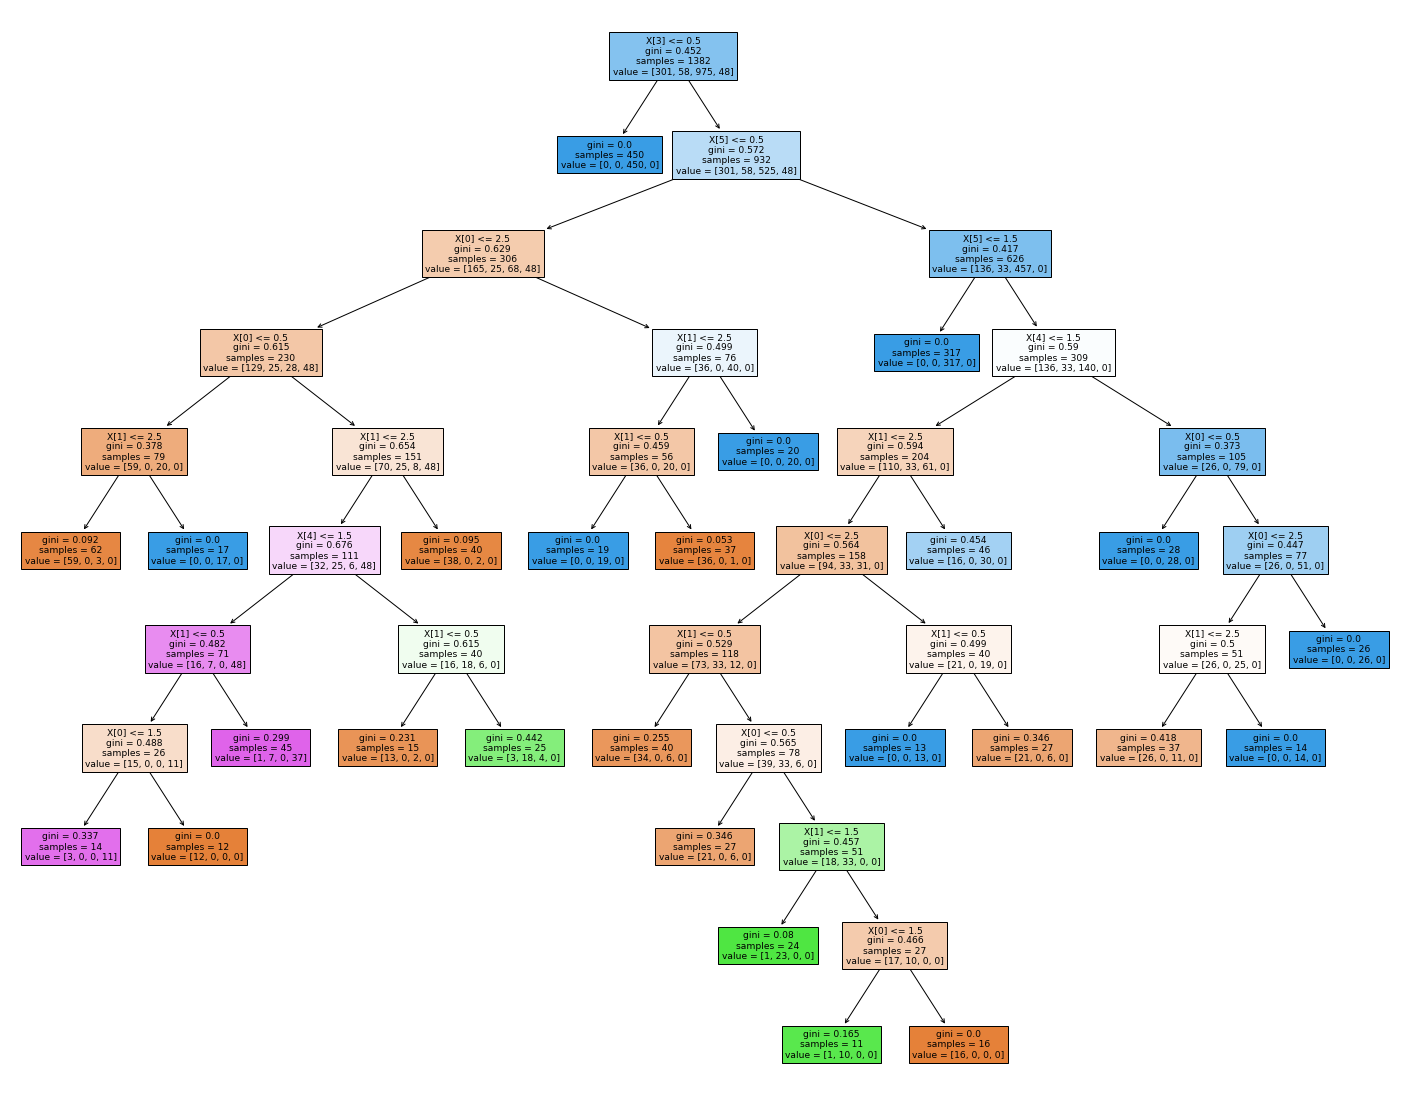

In [118]:
plotting(clfs[20:30][0]) #Model amb més accuracy d'aquest rang

## Comparativa

En comparativa respecte al performance dels models obtinguts en la búsqueda d'hiperparàmetres ninguna de les dues podes ha sigut beneficiosa ( tot i que s'ha fet una mica de poda previa en la búsqueda dels mateixos). Pel que respecta al tamany de l'arbre i l'eficiencia en termes de cómput la poda que ha donat millors resultats ha sigut la post poda.

## D. Ensembles / Ransom Forests

Finalment, una altra forma de reduir el overfitting és mitjançant l'ús d'ensembles. Els ensembles son agrupacions d' arbres de decisió, dels quals la sortida final és generada a través del promig de les classificacions individuals de cada arbre. 

Si tots els arbres es construïssin igual, la seva unió seria molt similar, i per tant no milloraria gaire. Per tal d'afavorir la variabilitat dels models, i aixi tenir un promig més ric, existeixen varies tècniques [documentació](https://scikit-learn.org/stable/modules/ensemble.html)

Per exemple, un dels més utilitzats són els `RandomForest`, que són una implementació especifica per ajuntar multiples arbres que retorna una mitja de la sortida de cada arbre, que ha sigut entrenat en un subconjunt aleatori de les dades. Ara bé, no són la única forma de fer ensembles. També existeixen els `ExtraTreesClassifier`, que encara afegeixen més variabilitat als arbres, restrigint la búsqueda de possibles nodes de decisió. D'altres formes d'ensembles podrien ser els `AdaBoost`, que en poques paraules, pesen els errors comesos pels arbres anteriors quan creen els següents arbres.

### Preguntes

1. Aplica models d'ensembles a les **dues** bases de dades. 
2. Compara els resultats obtinguts amb els diferents models. 
3. Quin dona millors resultats?
5. Pots combinar models que s'han après amb caracteristiques codificades de forma diferent? Creus que aconseguiràs un resultat més bo?


In [136]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier

from sklearn.model_selection import cross_val_score



def load_split_encode(path,target):
    df = pd.read_csv(path)
    print(df.columns)
    y = df[target]
    X = df.drop(target, axis="columns")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    encoder = ce.OrdinalEncoder(cols=X.columns)
    encoded_X_train_1 = encoder.fit_transform(X_train)
    encoded_X_test_1 = encoder.transform(X_test)
    y_train_lab_enc = LabelEncoder().fit_transform(y_train)
    y_test_lab_enc = LabelEncoder().fit_transform(y_test)
    return encoded_X_train_1,encoded_X_test_1,y_train_lab_enc,y_test_lab_enc

def RandomForest_use(X,Y):
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 42,n_jobs=14)# Train the model on training data
    rf.fit(X, Y)
    return rf

def ExtraTreesClassifier_use(X,Y):
    clf = ExtraTreesClassifier(n_estimators=1000, max_depth=None ,   min_samples_split=2, random_state=0,n_jobs=14)
    clf.fit(X,Y)
    return rf

def AdaBost_use(X,Y):
    clf =AdaBoostClassifier(n_estimators = 1000, random_state=42)
    clf.fit(X,Y)
    return clf

def test_model(clf,X_t,Y_t):
    return clf.score(X_t,Y_t)




In [137]:
dataset_path2 = 'income_evaluation.csv'
target_name2 = 'income'

dataset_inc = load_dataset(dataset_path2)
yy = dataset_inc[target_name2]
XX = dataset_inc.drop(target_name2, axis="columns")

print("Dimensionalitat de la BBDD:", dataset_inc.shape)

Dimensionalitat de la BBDD: (32561, 15)


In [138]:
paths = ['car_evaluation.csv','income_evaluation.csv']
info = {'AdaBost_Acc':[],'ExtraTreesClassifier_Acc':[],'RandomForest_Acc':[]}
for path,target in zip(paths,['class','income']):
    
    
    X,X_t,Y,Y_t = load_split_encode(path,target)
    
    rf = RandomForest_use(X,Y)
    info['RandomForest_Acc'].append(test_model(rf,X_t,Y_t))
    ab= AdaBost_use(X,Y)
    info['AdaBost_Acc'].append(test_model(ab,X_t,Y_t))
    etc = ExtraTreesClassifier_use(X,Y)
    info['ExtraTreesClassifier_Acc'].append(test_model(etc,X_t,Y_t))

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')
Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'income'],
      dtype='object')


# Comparativa de resultats

In [139]:
info

{'AdaBost_Acc': [0.7341040462427746, 0.8618148318747121],
 'ExtraTreesClassifier_Acc': [0.9595375722543352, 0.8404729003531399],
 'RandomForest_Acc': [0.9595375722543352, 0.8404729003531399]}

# Quin dona millors resultats?

Podem veure que és curios que el ExtraTreesClass i el Random Forest trobi el mateix tipus d'arbre (això sembla) donat que els resultats són exactament iguals (exactitud de decimals)

# Exemple per al 5

In [140]:
Ada = AdaBoostClassifier(clfs[10]).fit(X_train_enc_label_inc,y_train_enc_label_inc)

pred_inc_back = Ada.predict(X_test_enc_label_inc)
acc_back = accuracy_score(y_test_enc_label_inc,pred_inc_back)

print("El accuracy del ADABoost amb les dades del income i el BackWardEncoder es de: ",acc_back)

Ada = AdaBoostClassifier(clfs[10]).fit(X_train_enc_back,y_train_enc_back)
pred_back = Ada.predict(X_test_enc_back)
acc_car_back = accuracy_score(y_test_enc_back,pred_back)

print("El accuracy del ADABoost amb les dades dels cars i el BackWardEncoder es de: ",acc_car_back)


Ada = AdaBoostClassifier(clfs[10]).fit(X_train_enc_label,y_train_enc_label)
pred_label = Ada.predict(X_test_enc_label)
acc_car_label = accuracy_score(y_test_enc_label,pred_label)

print("El accuracy del ADABoost amb les dades dels cars i el OrdinalLabelEncoder es de: ",acc_car_label)

El accuracy del ADABoost amb les dades del income i el BackWardEncoder es de:  0.8641179180101336
El accuracy del ADABoost amb les dades dels cars i el BackWardEncoder es de:  0.9508670520231214
El accuracy del ADABoost amb les dades dels cars i el OrdinalLabelEncoder es de:  0.9161849710982659
